In [352]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import scipy.stats as stats
import itertools
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## SPOTIFY API

In [3]:
import requests
import json
client_id = '3665679d9c9b4c2197d1a10b0b5a6ace'
client_secret = '8d7dad22b6a94d99a505f6cd94afaf6b'

grant_type = 'client_credentials'

body_params = {'grant_type' : grant_type}

url='https://accounts.spotify.com/api/token'

response=requests.post(url, data=body_params, auth = (client_id, client_secret)) 
response.text

'{"access_token":"BQCOjMJ5HB1aNNk9NmIHnzJfE760WQZgFbYjx_ebCKIG1XGO4TZen3Ooo90H2HTX5hbK9mdXoHqrRkOEpZ4","token_type":"Bearer","expires_in":3600,"scope":""}'

In [4]:
access_token = 'BQCOjMJ5HB1aNNk9NmIHnzJfE760WQZgFbYjx_ebCKIG1XGO4TZen3Ooo90H2HTX5hbK9mdXoHqrRkOEpZ4'
headers = {'Authorization': 'Bearer '+ access_token}

## GENRES AVAILABLE

In [5]:
# retreiving spotify's list of genres
gr = requests.get('https://api.spotify.com/v1/recommendations/available-genre-seeds', headers=headers)
genres = gr.json()
genres

{'genres': ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'bossanova',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country',
  'dance',
  'dancehall',
  'death-metal',
  'deep-house',
  'detroit-techno',
  'disco',
  'disney',
  'drum-and-bass',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'emo',
  'folk',
  'forro',
  'french',
  'funk',
  'garage',
  'german',
  'gospel',
  'goth',
  'grindcore',
  'groove',
  'grunge',
  'guitar',
  'happy',
  'hard-rock',
  'hardcore',
  'hardstyle',
  'heavy-metal',
  'hip-hop',
  'holidays',
  'honky-tonk',
  'house',
  'idm',
  'indian',
  'indie',
  'indie-pop',
  'industrial',
  'iranian',
  'j-dance',
  'j-idol',
  'j-pop',
  'j-rock',
  'jazz',
  'k-pop',
  'kids',
  'latin',
  'latino',
  'malay',
  'mandopop',
  'metal',
  'metal-misc',
  'metalcore',


## GENRE PLAYLIST IDs

In [ ]:
# 7Mr3wEdKgaiAP4Cm2a6vda
# hip hop playlist
# 4MRGjKqlWuJZJ8XHOGcqkR 
# post rock playlist
# 37i9dQZF1DX4dyzvuaRJ0n
# electronic playlist
# 1o1HVRGIxwCcdSnNnZ69IC
# detroit_techo playlist
# 37i9dQZF1DWWEJlAGA9gs0
# classical playlist
# 0TCtFMz5lY6jTfusk66ZFj
# disco playlist
# 3kTtdRE1CtRyRKdicfOGAR
# electro indie pop playlist
# 30BUPgw52SWNm2ZWZZc86A
# industrial pop playlist
# 6Ph1K0QWCcEwYRr0VhVt6C
# french playlist

# 5khoF3ksobwfVwOazDqpqI
# spanish playlist
# 6mRRGF4klfgUzbD2ZKOCq0
# ska playlist
# 37i9dQZF1DWZd79rJ6a7lp
# sleep playlist
# 37i9dQZF1DX0xLQsW8b5Zx
# rockabilly playlist
# 2SwjQPegrTTYaOsWQrwhMe
# 50's Hits playlist

## FUNCTIONS

In [6]:
# fetch id function
def fetch_ids(songs):
    ids = []
    for song in songs['items']:
        ids.append(song['track']['id'])
    return ids

In [7]:
# fetch audio feature links function
def audio_features_(data):
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in data:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [8]:
# retrieve dictionary of track feature data
def fetch_features(links):
    feature_data = []
    for i in links:
        x = requests.get(i, headers=headers)
        j = x.content
        feature_data.append(json.loads(j))
    return feature_data

## Now Putting Them All Together

In [9]:
# all functions together to pull song list in and return dataframe
def song_return_feature_df(songs):
    ids = fetch_ids(songs)
    links = audio_features_(ids)
    feature_list = fetch_features(links)
    df = pd.DataFrame(feature_list)
    return df
    

## More Call Functions

In [10]:
# call spotify recieve playlist of songs as dictionary
def call_spotify(str):
    i = str
    base = 'https://api.spotify.com/v1/playlists/'
    end = '/tracks'
    r = requests.get(base + i + end, headers=headers)
    songs = r.json()
    return songs

In [11]:
# call spotify playlist, return features as dataframe
def call_spotify_return_feat_df(str):
    songs = call_spotify(str)
    df = song_return_feature_df(songs)
    return df
    

## Example of Full Function
function passes through playlist id and returns a data frame of all track ids and audio features

In [12]:
call_spotify_return_feat_df('7Mr3wEdKgaiAP4Cm2a6vda')

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.0533,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6,0.1130,-5.560,1,0.1020,136.041,4,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639
1,0.3340,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8,0.0571,-5.153,1,0.0717,129.875,4,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746
2,0.1810,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2,0.1370,-7.899,1,0.0845,129.972,4,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496
3,0.3420,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5,0.1230,-6.146,0,0.0752,153.848,4,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475
4,0.2330,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0,0.0924,-3.537,1,0.0402,120.003,4,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534
5,0.1070,https://api.spotify.com/v1/audio-analysis/56sx...,0.737,158784,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10,0.0786,-16.781,0,0.1020,157.928,3,https://api.spotify.com/v1/tracks/56sxR3i2zr7A...,audio_features,spotify:track:56sxR3i2zr7AtFbgGu12ZD,0.299
6,0.0224,https://api.spotify.com/v1/audio-analysis/0kvc...,0.734,240240,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4,0.1150,-4.693,0,0.0321,140.056,4,https://api.spotify.com/v1/tracks/0kvcPiQRHpwC...,audio_features,spotify:track:0kvcPiQRHpwC55CmI9CUzr,0.191
7,0.3340,https://api.spotify.com/v1/audio-analysis/1iSq...,0.736,222997,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9,0.1260,-9.682,0,0.0688,140.005,4,https://api.spotify.com/v1/tracks/1iSqfoUFnQwV...,audio_features,spotify:track:1iSqfoUFnQwV0QW1EfUit8,0.235
8,0.4560,https://api.spotify.com/v1/audio-analysis/5E1j...,0.548,174853,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5,0.1030,-3.875,1,0.0810,150.068,4,https://api.spotify.com/v1/tracks/5E1jEFXElio2...,audio_features,spotify:track:5E1jEFXElio2eOxjJ3WLnk,0.163
9,0.1630,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385


## Getting Track Names

In [13]:
# getting track names from playlist of songs as dictionary
def fetch_titles(songs):
    titles = []
    for song in songs['items']:
        titles.append(song['track']['name'])
    return titles

In [14]:
# calls playlist, returns titles of songs in playlist as dataframe
def fetch_track_names(str):
    songs = call_spotify(str)
    titles = fetch_titles(songs)
    df = pd.DataFrame(titles)
    return df

## Getting Artist Names and IDs

In [15]:
# getting artist names per track from playlist as dictionary
def fetch_artist(songs):
    x = []
    for song in songs['items']:
        x.append(song['track']['artists'])
        name = []
        for track in x:
            for artist in track:
                name.append(artist['name'])
    return name           

In [16]:
# getting artist ids per track from playlist as dictionary
def fetch_artist_ids(songs):
    x = []
    for song in songs['items']:
        x.append(song['track']['artists'])
        artist_ids = []
        for track in x:
            for artist in track:
                artist_ids.append(artist['id'])
    return artist_ids

In [17]:
# getting artist name and id per track from calling playlist returning as dataframe
def fetch_track_artist_info(str):
    songs = call_spotify(str)
    artist_names = fetch_artist(songs)
    artist_ids = fetch_artist_ids(songs)
    df = pd.DataFrame(artist_names)
    df2 = pd.DataFrame(artist_ids)
    df3 = df['ids'] = df2
    return df
    

In [18]:
fetch_track_artist_info('7Mr3wEdKgaiAP4Cm2a6vda')

,0,ids
0,Lil Nas X,7jVv8c5Fj3E9VhNjxT4snq
1,Billy Ray Cyrus,60rpJ9SgigSd16DOAG7GSa
2,XXXTENTACION,15UsOTVnJzReFVN1VCnxy4
3,PnB Rock,21WS9wngs9AqFckK7yYJPM
4,Trippie Redd,6Xgp2XMz1fhVYe7i6yNAax
5,Y2K,6USMTwO0MNDnKte5a5h0xx
6,bbno$,41X1TR6hrK8Q2ZCpp2EqCz
7,Lil Nas X,7jVv8c5Fj3E9VhNjxT4snq
8,Post Malone,246dkjvS1zLTtiykXe5h60
9,Rod Wave,45TgXXqMDdF8BkjA83OM7z


## HIP HOP PLAYLIST

In [19]:
# hip hop
r = requests.get("https://api.spotify.com/v1/playlists/7Mr3wEdKgaiAP4Cm2a6vda/tracks", headers=headers)

In [20]:
hip_hop_songs = r.json()

In [21]:
len(hip_hop_songs)

7

In [22]:
hip_hop_ids = []
for song in hip_hop_songs['items']:
    hip_hop_ids.append(song['track']['id'])

In [23]:
len(hip_hop_ids)

100

In [24]:
hip_hop_ids

['6u7jPi22kF8CTQ3rb9DHE7',
 '69dXVFCMiz3SL1L7M24NdX',
 '51Fjme0JiitpyXKuyQiCDo',
 '6fTt0CH2t0mdeB2N9XFG5r',
 '4VginDwYTP2eaHJzO0QMjG',
 '56sxR3i2zr7AtFbgGu12ZD',
 '0kvcPiQRHpwC55CmI9CUzr',
 '1iSqfoUFnQwV0QW1EfUit8',
 '5E1jEFXElio2eOxjJ3WLnk',
 '6MWtB6iiXyIwun0YzU6DFP',
 '7aiClxsDWFRQ0Kzk5KI5ku',
 '4Yq3XUNfWrAPWuB94qkC09',
 '7C39RtGhnEw7cyf0Pyw7PV',
 '6hkr5ZGVOt3Z2BNGE6yqpB',
 '6fWa5CRgy0z30OeGZyMBvD',
 '77Y7tccX9Hx5iClDr39uy9',
 '4sjiIpEv617LDXaidKioOI',
 '7x9nXsowok1JszkVztI5NI',
 '711MglQhnhOF3UAiAs9A59',
 '2ktxr00GpTtbMNeBjNeY8D',
 '3KkXRkHbMCARz0aVfEt68P',
 '1CxYDvfq3KVvsPSZ9NCdM9',
 '3US2r3B2F7ZtEXsQ4zrjVl',
 '4CH66Rxcjcj3VBHwmIBj4T',
 '0c7K73roy6RW4ebDkf4yGh',
 '4XiGKQqbmnMVxDzUj6j3f2',
 '59PYPDxTbqJpiGfyogPb5h',
 '6uYgCE2OEulOw5zhHvZsHf',
 '4dV3okcjbQwTcg4ObIGr4N',
 '5PkXk4r0K9oseq7io6hVSb',
 '0rhxoXFMKRtm1dQJfi72Yh',
 '4thnq3xsCY2KdVGWxM6y38',
 '6cjSh516BbrNUs213jDAGm',
 '3fx31TjnwvwZIyAGHhOhA1',
 '03i4lR6ZZo0214WhmrE8t9',
 '5UYK9MervBCROg8AHNeEIy',
 '41MCdlvXOl62B7Kv86Bb1v',
 

In [28]:
# function that returns links for all track IDs in order to call for track features
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in hip_hop_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [29]:
hip_links = audio_features()

In [30]:
hip_links

['https://api.spotify.com/v1/audio-features/6u7jPi22kF8CTQ3rb9DHE7',
 'https://api.spotify.com/v1/audio-features/69dXVFCMiz3SL1L7M24NdX',
 'https://api.spotify.com/v1/audio-features/51Fjme0JiitpyXKuyQiCDo',
 'https://api.spotify.com/v1/audio-features/6fTt0CH2t0mdeB2N9XFG5r',
 'https://api.spotify.com/v1/audio-features/4VginDwYTP2eaHJzO0QMjG',
 'https://api.spotify.com/v1/audio-features/56sxR3i2zr7AtFbgGu12ZD',
 'https://api.spotify.com/v1/audio-features/0kvcPiQRHpwC55CmI9CUzr',
 'https://api.spotify.com/v1/audio-features/1iSqfoUFnQwV0QW1EfUit8',
 'https://api.spotify.com/v1/audio-features/5E1jEFXElio2eOxjJ3WLnk',
 'https://api.spotify.com/v1/audio-features/6MWtB6iiXyIwun0YzU6DFP',
 'https://api.spotify.com/v1/audio-features/7aiClxsDWFRQ0Kzk5KI5ku',
 'https://api.spotify.com/v1/audio-features/4Yq3XUNfWrAPWuB94qkC09',
 'https://api.spotify.com/v1/audio-features/7C39RtGhnEw7cyf0Pyw7PV',
 'https://api.spotify.com/v1/audio-features/6hkr5ZGVOt3Z2BNGE6yqpB',
 'https://api.spotify.com/v1/audio

## EXAMPLE OF TRACK FEATURE RETURN

In [31]:
r_h = requests.get(f"https://api.spotify.com/v1/audio-features/6fTt0CH2t0mdeB2N9XFG5r", headers=headers)

In [32]:
r_h_fearures = r_h.json()

In [33]:
r_h_fearures

{'danceability': 0.703,
 'energy': 0.594,
 'key': 5,
 'loudness': -6.146,
 'mode': 0,
 'speechiness': 0.0752,
 'acousticness': 0.342,
 'instrumentalness': 0,
 'liveness': 0.123,
 'valence': 0.475,
 'tempo': 153.848,
 'type': 'audio_features',
 'id': '6fTt0CH2t0mdeB2N9XFG5r',
 'uri': 'spotify:track:6fTt0CH2t0mdeB2N9XFG5r',
 'track_href': 'https://api.spotify.com/v1/tracks/6fTt0CH2t0mdeB2N9XFG5r',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6fTt0CH2t0mdeB2N9XFG5r',
 'duration_ms': 114893,
 'time_signature': 4}

In [34]:
# retrieving dictionary of track features for all track ID
hip_feature_data = []
for i in hip_links:
    x = requests.get(i, headers=headers)
    j = x.content
    hip_feature_data.append(json.loads(j))


In [35]:
hip_feature_data

[{'danceability': 0.878,
  'energy': 0.619,
  'key': 6,
  'loudness': -5.56,
  'mode': 1,
  'speechiness': 0.102,
  'acousticness': 0.0533,
  'instrumentalness': 0,
  'liveness': 0.113,
  'valence': 0.639,
  'tempo': 136.041,
  'type': 'audio_features',
  'id': '6u7jPi22kF8CTQ3rb9DHE7',
  'uri': 'spotify:track:6u7jPi22kF8CTQ3rb9DHE7',
  'track_href': 'https://api.spotify.com/v1/tracks/6u7jPi22kF8CTQ3rb9DHE7',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6u7jPi22kF8CTQ3rb9DHE7',
  'duration_ms': 157067,
  'time_signature': 4},
 {'danceability': 0.799,
  'energy': 0.526,
  'key': 8,
  'loudness': -5.153,
  'mode': 1,
  'speechiness': 0.0717,
  'acousticness': 0.334,
  'instrumentalness': 0.00174,
  'liveness': 0.0571,
  'valence': 0.746,
  'tempo': 129.875,
  'type': 'audio_features',
  'id': '69dXVFCMiz3SL1L7M24NdX',
  'uri': 'spotify:track:69dXVFCMiz3SL1L7M24NdX',
  'track_href': 'https://api.spotify.com/v1/tracks/69dXVFCMiz3SL1L7M24NdX',
  'analysis_url': 'https://api.

In [36]:
# converting feature dictionary to dataframe
hip_df = pd.DataFrame(hip_feature_data)

In [38]:
hip_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.0533,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.00000,6,0.1130,-5.560,1,0.1020,136.041,4,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639,Hip_hop
1,0.3340,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475,0.526,69dXVFCMiz3SL1L7M24NdX,0.00174,8,0.0571,-5.153,1,0.0717,129.875,4,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746,Hip_hop
2,0.1810,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627,0.391,51Fjme0JiitpyXKuyQiCDo,0.00000,2,0.1370,-7.899,1,0.0845,129.972,4,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496,Hip_hop
3,0.3420,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.00000,5,0.1230,-6.146,0,0.0752,153.848,4,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475,Hip_hop
4,0.2330,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907,0.758,4VginDwYTP2eaHJzO0QMjG,0.00144,0,0.0924,-3.537,1,0.0402,120.003,4,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534,Hip_hop


In [37]:
hip_df['Genre'] = 'Hip_hop'

In [39]:
hip_titles = fetch_track_names('7Mr3wEdKgaiAP4Cm2a6vda')
hip_titles.head()

,0
0,Old Town Road (feat. Billy Ray Cyrus) - Remix
1,bad vibes forever
2,Lalala
3,Panini
4,Circles


## CHILL HOP PLAYLIST

In [40]:
# chill-hop
r_1 = requests.get("https://api.spotify.com/v1/playlists/6wKpQXadMOeAV4os8CC75x/tracks", headers=headers)

In [41]:
chill_hop_songs = r_1.json()

In [42]:
len(chill_hop_songs)

7

In [43]:
chill_hop_ids = []
for song in chill_hop_songs['items']:
    chill_hop_ids.append(song['track']['id'])

In [44]:
len(chill_hop_ids)

100

In [45]:
chill_hop_ids

['6O3x6SLchofNuv13nXkOnl',
 '3HIvdhRKSx1XxLnNsUPVHy',
 '7vyKK8WAJae6kof7q7VvDA',
 '472amW2rwsFhBCnQJK9jSn',
 '7co3Tz63XzzlPcW3TSfGsB',
 '35eAzAd0g3Yr4UVP3Ho2td',
 '6elKwR3SuOsGMKOP2hMMcx',
 '3HuU02yMVfrCguNrBFAGJu',
 '2xCr4G5ojdyvGDC5y96B9B',
 '0TJSBCJvHyutqhiyExcpa5',
 '2IYPP086c5gi0bYJx5ZMaD',
 '0z7QCHOnnIPiilUkEQ0Y1s',
 '70lgkc1F7j0gnxtkbHq8MC',
 '2vpuybAiQsajGQVsJKtJjt',
 '1BnluQelsPJlvg6bBom0do',
 '6Ai9mjtlm46bnEmk8Ejjrc',
 '18Ktcdrfd4PM8CVifwHmCK',
 '2oFQqo6YyVeQDTpVjhUfwE',
 '5LB1ioxHReMQEmL7k5uF7d',
 '5IcbzJcezQV3vSHWAZSfrQ',
 '2YacFgN79ou7TjlT4VNK6A',
 '78IOa4E1H4SCGTXEESQuQf',
 '3queTeHOe8uLszhAyONGxM',
 '1aia2ubPWSFARVSc2jKMyH',
 '3m14rbQLGX2IYMcbY6HEnx',
 '19CP4yU38sgVcaiqMge6JS',
 '7fJiLcr0zFlvYbIdpBJrsK',
 '5UtPVEhQB8MLYnduH8cv3k',
 '24Lg8ci8pExyxoaJKAUvTb',
 '6ErsLpyCu1yh8RMjEYe9RB',
 '3U19GVybWYwG0wMXzrgL2h',
 '3zeWT8VUs30Jk5WwOKMLQP',
 '62sGfSPryJY7DR7x8iJxBO',
 '7peHijfn5w83Luf42L5iW1',
 '58IEi56ipBaZppE4UFAYQS',
 '3MN77J8w1qx9cwR7bJdtFx',
 '2tFG983Ad7j1JsS9G1c5HH',
 

In [46]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in chill_hop_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [47]:
chill_links = audio_features()

In [48]:
chill_links

['https://api.spotify.com/v1/audio-features/6O3x6SLchofNuv13nXkOnl',
 'https://api.spotify.com/v1/audio-features/3HIvdhRKSx1XxLnNsUPVHy',
 'https://api.spotify.com/v1/audio-features/7vyKK8WAJae6kof7q7VvDA',
 'https://api.spotify.com/v1/audio-features/472amW2rwsFhBCnQJK9jSn',
 'https://api.spotify.com/v1/audio-features/7co3Tz63XzzlPcW3TSfGsB',
 'https://api.spotify.com/v1/audio-features/35eAzAd0g3Yr4UVP3Ho2td',
 'https://api.spotify.com/v1/audio-features/6elKwR3SuOsGMKOP2hMMcx',
 'https://api.spotify.com/v1/audio-features/3HuU02yMVfrCguNrBFAGJu',
 'https://api.spotify.com/v1/audio-features/2xCr4G5ojdyvGDC5y96B9B',
 'https://api.spotify.com/v1/audio-features/0TJSBCJvHyutqhiyExcpa5',
 'https://api.spotify.com/v1/audio-features/2IYPP086c5gi0bYJx5ZMaD',
 'https://api.spotify.com/v1/audio-features/0z7QCHOnnIPiilUkEQ0Y1s',
 'https://api.spotify.com/v1/audio-features/70lgkc1F7j0gnxtkbHq8MC',
 'https://api.spotify.com/v1/audio-features/2vpuybAiQsajGQVsJKtJjt',
 'https://api.spotify.com/v1/audio

In [49]:
# retrieving dictionary of track features
chill_feature_data = []
for i in chill_links:
    x = requests.get(i, headers=headers)
    j = x.content
    chill_feature_data.append(json.loads(j))

In [50]:
chill_feature_data

[{'danceability': 0.751,
  'energy': 0.594,
  'key': 1,
  'loudness': -8.931,
  'mode': 1,
  'speechiness': 0.117,
  'acousticness': 0.334,
  'instrumentalness': 0.841,
  'liveness': 0.106,
  'valence': 0.639,
  'tempo': 86.985,
  'type': 'audio_features',
  'id': '6O3x6SLchofNuv13nXkOnl',
  'uri': 'spotify:track:6O3x6SLchofNuv13nXkOnl',
  'track_href': 'https://api.spotify.com/v1/tracks/6O3x6SLchofNuv13nXkOnl',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6O3x6SLchofNuv13nXkOnl',
  'duration_ms': 99310,
  'time_signature': 4},
 {'danceability': 0.737,
  'energy': 0.284,
  'key': 8,
  'loudness': -8.535,
  'mode': 0,
  'speechiness': 0.114,
  'acousticness': 0.381,
  'instrumentalness': 0.89,
  'liveness': 0.812,
  'valence': 0.75,
  'tempo': 87.967,
  'type': 'audio_features',
  'id': '3HIvdhRKSx1XxLnNsUPVHy',
  'uri': 'spotify:track:3HIvdhRKSx1XxLnNsUPVHy',
  'track_href': 'https://api.spotify.com/v1/tracks/3HIvdhRKSx1XxLnNsUPVHy',
  'analysis_url': 'https://api.spoti

In [51]:
chill_df = pd.DataFrame(chill_feature_data)

In [52]:
chill_df['Genre'] = 'Chill_hop'

In [53]:
chill_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.33400,https://api.spotify.com/v1/audio-analysis/6O3x...,0.751,99310,0.594,6O3x6SLchofNuv13nXkOnl,0.841,1,0.106,-8.931,1,0.1170,86.985,4,https://api.spotify.com/v1/tracks/6O3x6SLchofN...,audio_features,spotify:track:6O3x6SLchofNuv13nXkOnl,0.639,Chill_hop
1,0.38100,https://api.spotify.com/v1/audio-analysis/3HIv...,0.737,143437,0.284,3HIvdhRKSx1XxLnNsUPVHy,0.890,8,0.812,-8.535,0,0.1140,87.967,4,https://api.spotify.com/v1/tracks/3HIvdhRKSx1X...,audio_features,spotify:track:3HIvdhRKSx1XxLnNsUPVHy,0.750,Chill_hop
2,0.00385,https://api.spotify.com/v1/audio-analysis/7vyK...,0.600,202000,0.697,7vyKK8WAJae6kof7q7VvDA,0.877,9,0.150,-6.453,0,0.0617,96.035,4,https://api.spotify.com/v1/tracks/7vyKK8WAJae6...,audio_features,spotify:track:7vyKK8WAJae6kof7q7VvDA,0.294,Chill_hop
3,0.35100,https://api.spotify.com/v1/audio-analysis/472a...,0.722,176000,0.585,472amW2rwsFhBCnQJK9jSn,0.867,5,0.111,-9.824,0,0.0390,88.002,4,https://api.spotify.com/v1/tracks/472amW2rwsFh...,audio_features,spotify:track:472amW2rwsFhBCnQJK9jSn,0.365,Chill_hop
4,0.50300,https://api.spotify.com/v1/audio-analysis/7co3...,0.673,181482,0.356,7co3Tz63XzzlPcW3TSfGsB,0.814,3,0.111,-10.683,0,0.0365,81.009,4,https://api.spotify.com/v1/tracks/7co3Tz63Xzzl...,audio_features,spotify:track:7co3Tz63XzzlPcW3TSfGsB,0.145,Chill_hop


In [54]:
chill_titles = fetch_track_names('6wKpQXadMOeAV4os8CC75x')
chill_titles.head()

,0
0,connection
1,You Should Have Known
2,Corporate Japan
3,Do Some Real
4,OdeToYou


## POST ROCK PLAYLIST

In [55]:
# post rock
r_2 = requests.get("https://api.spotify.com/v1/playlists/4MRGjKqlWuJZJ8XHOGcqkR/tracks", headers=headers)

In [56]:
post_rock_songs = r_2.json()

In [57]:
len(post_rock_songs)

7

In [58]:
post_rock_ids = []
for song in post_rock_songs['items']:
    post_rock_ids.append(song['track']['id'])

In [59]:
len(post_rock_ids)

100

In [60]:
post_rock_ids

['2XoDCSU6sEjFGFrLsoC1pu',
 '6sHvCpDExlnbMrlhcEAOy0',
 '0iRb9QCi3UioohEiOGELTA',
 '39JVOre1JjM4InF5yVgz3J',
 '5vgVeexxN6UB8bjfWsXjxq',
 '3xP4JQ3gcuATNrwV4gcIYA',
 '1lxmLXJ6Tc8ppOaz5LbHRN',
 '3TQUHDGT4Oko43GI9kr5zT',
 '5katCvjFfNxnYL4bQ1abfR',
 '0xjcGbD5FXbkNIv023s8OD',
 '2kZVhrdxG7BEIsyrTJYdq9',
 '0WCvBujFldzGsAimcyjchH',
 '3q4YpyWd3GbB8i9I38CQhB',
 '2AHejGSGKvO4qu4f26uyEa',
 '0DeyIYrCFdd3m7VIQaZIMh',
 '2wWQwx1ymkpCr4ItPUQ94g',
 '2sSuwXiSTGIqS7hB9EfhPL',
 '22WgjeML3aIw6HHYs8CEnV',
 '4cn89zUWSFEuk7i6pi1nal',
 '6S7uVSinsFkrrL8n5JUqZx',
 '2YbBVjG9fzgspWCnJFcR3L',
 '5X0AADu31poznfyAYLPANq',
 '6HW4JBowuE77XPbOBBIXfn',
 '0ZsiISbkNooATBpvdaNr7z',
 '6P9GZDc29KCYuo6M7NyelS',
 '0zuVa6G7IFOJTyu8FdEN4B',
 '1GHzeSulMJoMsg10LtjYBN',
 '31cvxujSkxYLZE1ZQG9OXb',
 '0AbbQIiNr32RLbfoTZAPpw',
 '11SRwZDBMOgiJjLPLYGCRT',
 '6y2I3JvP81V5J4TKAY3O3e',
 '2VKl041fBuLQQqrJteo1WC',
 '3zmlYVsYnkAFDZZCQWZklG',
 '4FTMGhb3xvuYfqNWsQoYz8',
 '0UE9bqforqVFOvuSvmnhxi',
 '0EIO8ORzhZoYRao0TIjTbv',
 '5VIFxC6bxXFcywBpTznGwA',
 

In [61]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in post_rock_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [62]:
post_links = audio_features()

In [63]:
post_links

['https://api.spotify.com/v1/audio-features/2XoDCSU6sEjFGFrLsoC1pu',
 'https://api.spotify.com/v1/audio-features/6sHvCpDExlnbMrlhcEAOy0',
 'https://api.spotify.com/v1/audio-features/0iRb9QCi3UioohEiOGELTA',
 'https://api.spotify.com/v1/audio-features/39JVOre1JjM4InF5yVgz3J',
 'https://api.spotify.com/v1/audio-features/5vgVeexxN6UB8bjfWsXjxq',
 'https://api.spotify.com/v1/audio-features/3xP4JQ3gcuATNrwV4gcIYA',
 'https://api.spotify.com/v1/audio-features/1lxmLXJ6Tc8ppOaz5LbHRN',
 'https://api.spotify.com/v1/audio-features/3TQUHDGT4Oko43GI9kr5zT',
 'https://api.spotify.com/v1/audio-features/5katCvjFfNxnYL4bQ1abfR',
 'https://api.spotify.com/v1/audio-features/0xjcGbD5FXbkNIv023s8OD',
 'https://api.spotify.com/v1/audio-features/2kZVhrdxG7BEIsyrTJYdq9',
 'https://api.spotify.com/v1/audio-features/0WCvBujFldzGsAimcyjchH',
 'https://api.spotify.com/v1/audio-features/3q4YpyWd3GbB8i9I38CQhB',
 'https://api.spotify.com/v1/audio-features/2AHejGSGKvO4qu4f26uyEa',
 'https://api.spotify.com/v1/audio

In [64]:
# retrieving dictionary of track features
post_feature_data = []
for i in post_links:
    x = requests.get(i, headers=headers)
    j = x.content
    post_feature_data.append(json.loads(j))

In [65]:
post_feature_data

[{'danceability': 0.417,
  'energy': 0.257,
  'key': 2,
  'loudness': -15.197,
  'mode': 1,
  'speechiness': 0.0375,
  'acousticness': 0.214,
  'instrumentalness': 0.489,
  'liveness': 0.152,
  'valence': 0.0333,
  'tempo': 132.576,
  'type': 'audio_features',
  'id': '2XoDCSU6sEjFGFrLsoC1pu',
  'uri': 'spotify:track:2XoDCSU6sEjFGFrLsoC1pu',
  'track_href': 'https://api.spotify.com/v1/tracks/2XoDCSU6sEjFGFrLsoC1pu',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2XoDCSU6sEjFGFrLsoC1pu',
  'duration_ms': 357160,
  'time_signature': 4},
 {'danceability': 0.527,
  'energy': 0.504,
  'key': 2,
  'loudness': -13.95,
  'mode': 0,
  'speechiness': 0.0348,
  'acousticness': 0.141,
  'instrumentalness': 0.865,
  'liveness': 0.144,
  'valence': 0.0384,
  'tempo': 137.55,
  'type': 'audio_features',
  'id': '6sHvCpDExlnbMrlhcEAOy0',
  'uri': 'spotify:track:6sHvCpDExlnbMrlhcEAOy0',
  'track_href': 'https://api.spotify.com/v1/tracks/6sHvCpDExlnbMrlhcEAOy0',
  'analysis_url': 'https://

In [66]:
post_df = pd.DataFrame(post_feature_data)

In [69]:
post_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.2140,https://api.spotify.com/v1/audio-analysis/2XoD...,0.417,357160,0.257,2XoDCSU6sEjFGFrLsoC1pu,0.489,2,0.1520,-15.197,1,0.0375,132.576,4,https://api.spotify.com/v1/tracks/2XoDCSU6sEjF...,audio_features,spotify:track:2XoDCSU6sEjFGFrLsoC1pu,0.0333,Post_Rock
1,0.1410,https://api.spotify.com/v1/audio-analysis/6sHv...,0.527,450987,0.504,6sHvCpDExlnbMrlhcEAOy0,0.865,2,0.1440,-13.950,0,0.0348,137.550,4,https://api.spotify.com/v1/tracks/6sHvCpDExlnb...,audio_features,spotify:track:6sHvCpDExlnbMrlhcEAOy0,0.0384,Post_Rock
2,0.0348,https://api.spotify.com/v1/audio-analysis/0iRb...,0.126,282400,0.612,0iRb9QCi3UioohEiOGELTA,0.591,2,0.0895,-9.923,1,0.0408,94.519,4,https://api.spotify.com/v1/tracks/0iRb9QCi3Uio...,audio_features,spotify:track:0iRb9QCi3UioohEiOGELTA,0.0348,Post_Rock
3,0.0156,https://api.spotify.com/v1/audio-analysis/39JV...,0.236,571133,0.549,39JVOre1JjM4InF5yVgz3J,0.377,6,0.2750,-8.261,0,0.0317,175.840,4,https://api.spotify.com/v1/tracks/39JVOre1JjM4...,audio_features,spotify:track:39JVOre1JjM4InF5yVgz3J,0.0398,Post_Rock
4,0.4690,https://api.spotify.com/v1/audio-analysis/5vgV...,0.259,309280,0.426,5vgVeexxN6UB8bjfWsXjxq,0.946,9,0.0894,-16.046,0,0.0367,158.041,4,https://api.spotify.com/v1/tracks/5vgVeexxN6UB...,audio_features,spotify:track:5vgVeexxN6UB8bjfWsXjxq,0.0519,Post_Rock


In [68]:
post_df['Genre'] = 'Post_Rock'

In [70]:
post_titles = fetch_track_names('4MRGjKqlWuJZJ8XHOGcqkR')
post_titles.head()

,0
0,Yes! I Am a Long Way from Home
1,Superheroes Of BMX
2,Stop Coming To My House
3,Two Rights Make One Wrong
4,Stupid Prick Gets Chased By The Police And Los...


## ELECTRONIC PLAYLIST

In [71]:
# electronic playlist
r_3 = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX4dyzvuaRJ0n/tracks", headers=headers)

In [72]:
electronic_songs = r_3.json()

In [73]:
len(electronic_songs)

7

In [74]:
electronic_ids = []
for song in electronic_songs['items']:
    electronic_ids.append(song['track']['id'])

In [75]:
len(electronic_ids)

65

In [76]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in electronic_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [77]:
electronic_links = audio_features()

In [78]:
electronic_links

['https://api.spotify.com/v1/audio-features/1CRy08G60mS5jvhB27xMpS',
 'https://api.spotify.com/v1/audio-features/4QAUGy6k7c3IOAhgWz52r7',
 'https://api.spotify.com/v1/audio-features/6m8SIT10j41SPpPFOknTmP',
 'https://api.spotify.com/v1/audio-features/35MKhw2YBKApmD7fAnPERC',
 'https://api.spotify.com/v1/audio-features/0IhTEIjFaRt3B2NQYf9azQ',
 'https://api.spotify.com/v1/audio-features/4Qv71lFPCObf7zol1uWCJb',
 'https://api.spotify.com/v1/audio-features/7CHi4DtfK4heMlQaudCuHK',
 'https://api.spotify.com/v1/audio-features/1dDDVfAfms7M6VLLKmubaJ',
 'https://api.spotify.com/v1/audio-features/1WGJcUaJaB2HWVeWjv4Yfz',
 'https://api.spotify.com/v1/audio-features/6hciDCyJDYCsYQp2lH6kdA',
 'https://api.spotify.com/v1/audio-features/3Hah1es0TvdRG7HWNx5e3E',
 'https://api.spotify.com/v1/audio-features/5tuOGRYPjh5lV6M5zbNRNH',
 'https://api.spotify.com/v1/audio-features/3xmJo7JydhDml7GAS9YTcN',
 'https://api.spotify.com/v1/audio-features/1euEMWtuw87OGTPcHkqjAK',
 'https://api.spotify.com/v1/audio

In [79]:
# retrieving dictionary of track features
electronic_feature_data = []
for i in electronic_links:
    x = requests.get(i, headers=headers)
    j = x.content
    electronic_feature_data.append(json.loads(j))

In [80]:
electronic_feature_data

[{'danceability': 0.712,
  'energy': 0.664,
  'key': 11,
  'loudness': -8.026,
  'mode': 1,
  'speechiness': 0.0345,
  'acousticness': 0.0416,
  'instrumentalness': 0.000104,
  'liveness': 0.0668,
  'valence': 0.781,
  'tempo': 122.014,
  'type': 'audio_features',
  'id': '1CRy08G60mS5jvhB27xMpS',
  'uri': 'spotify:track:1CRy08G60mS5jvhB27xMpS',
  'track_href': 'https://api.spotify.com/v1/tracks/1CRy08G60mS5jvhB27xMpS',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1CRy08G60mS5jvhB27xMpS',
  'duration_ms': 204514,
  'time_signature': 4},
 {'danceability': 0.572,
  'energy': 0.934,
  'key': 6,
  'loudness': -5.053,
  'mode': 0,
  'speechiness': 0.0446,
  'acousticness': 0.00292,
  'instrumentalness': 0.0198,
  'liveness': 0.105,
  'valence': 0.204,
  'tempo': 125.948,
  'type': 'audio_features',
  'id': '4QAUGy6k7c3IOAhgWz52r7',
  'uri': 'spotify:track:4QAUGy6k7c3IOAhgWz52r7',
  'track_href': 'https://api.spotify.com/v1/tracks/4QAUGy6k7c3IOAhgWz52r7',
  'analysis_url': 'h

In [81]:
electronic_df = pd.DataFrame(electronic_feature_data)

In [84]:
electronic_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.04160,https://api.spotify.com/v1/audio-analysis/1CRy...,0.712,204514,0.664,1CRy08G60mS5jvhB27xMpS,0.000104,11,0.0668,-8.026,1,0.0345,122.014,4,https://api.spotify.com/v1/tracks/1CRy08G60mS5...,audio_features,spotify:track:1CRy08G60mS5jvhB27xMpS,0.781,Electronic
1,0.00292,https://api.spotify.com/v1/audio-analysis/4QAU...,0.572,215238,0.934,4QAUGy6k7c3IOAhgWz52r7,0.019800,6,0.1050,-5.053,0,0.0446,125.948,4,https://api.spotify.com/v1/tracks/4QAUGy6k7c3I...,audio_features,spotify:track:4QAUGy6k7c3IOAhgWz52r7,0.204,Electronic
2,0.00522,https://api.spotify.com/v1/audio-analysis/6m8S...,0.563,247385,0.810,6m8SIT10j41SPpPFOknTmP,0.000000,2,0.0846,-2.921,1,0.0522,129.975,4,https://api.spotify.com/v1/tracks/6m8SIT10j41S...,audio_features,spotify:track:6m8SIT10j41SPpPFOknTmP,0.495,Electronic
3,0.14500,https://api.spotify.com/v1/audio-analysis/35MK...,0.547,186805,0.795,35MKhw2YBKApmD7fAnPERC,0.000000,8,0.1100,-3.721,1,0.0489,118.118,4,https://api.spotify.com/v1/tracks/35MKhw2YBKAp...,audio_features,spotify:track:35MKhw2YBKApmD7fAnPERC,0.723,Electronic
4,0.03950,https://api.spotify.com/v1/audio-analysis/0IhT...,0.774,191399,0.723,0IhTEIjFaRt3B2NQYf9azQ,0.000018,2,0.1000,-5.545,1,0.0496,121.057,4,https://api.spotify.com/v1/tracks/0IhTEIjFaRt3...,audio_features,spotify:track:0IhTEIjFaRt3B2NQYf9azQ,0.769,Electronic


In [83]:
electronic_df['Genre'] = 'Electronic'

In [85]:
electronic_titles = fetch_track_names('37i9dQZF1DX4dyzvuaRJ0n')
electronic_titles.head()

,0
0,Juliet & Romeo
1,Heaven - David Guetta & MORTEN Remix
2,Good Things Fall Apart (with Jon Bellion) [Tië...
3,Faith (with Dolly Parton) [feat. Mr. Probz]
4,Thing For You (With Martin Solveig)


## DETROIT TECHO PLAYLIST

In [86]:
# detroit_techno playlist
r_4 = requests.get("https://api.spotify.com/v1/playlists/1o1HVRGIxwCcdSnNnZ69IC/tracks", headers=headers)

In [87]:
detroit_techno_songs = r_4.json()

In [88]:
len(detroit_techno_songs)

7

In [89]:
detroit_techno_ids = []
for song in detroit_techno_songs['items']:
    detroit_techno_ids.append(song['track']['id'])

In [90]:
len(detroit_techno_ids)

56

In [91]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in detroit_techno_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [92]:
detroit_techno_links = audio_features()

In [93]:
detroit_techno_links

['https://api.spotify.com/v1/audio-features/7DXfJX286N3ZBURaq8D9mc',
 'https://api.spotify.com/v1/audio-features/2T6rMXWYc934IWMudx1H1X',
 'https://api.spotify.com/v1/audio-features/6CkLFR9wcDaRjyhxdTydBg',
 'https://api.spotify.com/v1/audio-features/6v4tA05iYtUZ7N7l2Nd6HD',
 'https://api.spotify.com/v1/audio-features/19vBMI6eXO6Ec63q9SXzfe',
 'https://api.spotify.com/v1/audio-features/3BuGppS6EPjPOxuYZ9tvnW',
 'https://api.spotify.com/v1/audio-features/6Au8dwqW17E3rykzOtXzqn',
 'https://api.spotify.com/v1/audio-features/1Q398WdzkY0XBqnwCBseIj',
 'https://api.spotify.com/v1/audio-features/0v2RtEQMs7Hd6LLTYIBcUQ',
 'https://api.spotify.com/v1/audio-features/0oe3RsEJZRr7XeofKjgvTq',
 'https://api.spotify.com/v1/audio-features/2AoGPNyWIsnPTHhJnHdIuf',
 'https://api.spotify.com/v1/audio-features/1p3YoNTUfE13h4eFDHmmSa',
 'https://api.spotify.com/v1/audio-features/2983XTyCSbBN56LrbpG8TU',
 'https://api.spotify.com/v1/audio-features/4UA6e7utxOZkHesY9Xv4X5',
 'https://api.spotify.com/v1/audio

In [94]:
detroit_techno_feature_data = []
for i in detroit_techno_links:
    x = requests.get(i, headers=headers)
    j = x.content
    detroit_techno_feature_data.append(json.loads(j))

In [95]:
detroit_techno_feature_data

[{'danceability': 0.714,
  'energy': 0.873,
  'key': 2,
  'loudness': -6.223,
  'mode': 1,
  'speechiness': 0.0658,
  'acousticness': 0.152,
  'instrumentalness': 0.868,
  'liveness': 0.0848,
  'valence': 0.516,
  'tempo': 128.103,
  'type': 'audio_features',
  'id': '7DXfJX286N3ZBURaq8D9mc',
  'uri': 'spotify:track:7DXfJX286N3ZBURaq8D9mc',
  'track_href': 'https://api.spotify.com/v1/tracks/7DXfJX286N3ZBURaq8D9mc',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7DXfJX286N3ZBURaq8D9mc',
  'duration_ms': 362947,
  'time_signature': 4},
 {'danceability': 0.645,
  'energy': 0.877,
  'key': 7,
  'loudness': -10.616,
  'mode': 1,
  'speechiness': 0.0456,
  'acousticness': 0.00657,
  'instrumentalness': 0.858,
  'liveness': 0.127,
  'valence': 0.473,
  'tempo': 124.697,
  'type': 'audio_features',
  'id': '2T6rMXWYc934IWMudx1H1X',
  'uri': 'spotify:track:2T6rMXWYc934IWMudx1H1X',
  'track_href': 'https://api.spotify.com/v1/tracks/2T6rMXWYc934IWMudx1H1X',
  'analysis_url': 'https:

In [96]:
detroit_techno_df = pd.DataFrame(detroit_techno_feature_data)

In [99]:
detroit_techno_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,error,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.15200,https://api.spotify.com/v1/audio-analysis/7DXf...,0.714,362947.0,0.873,NaN,7DXfJX286N3ZBURaq8D9mc,0.868,2.0,0.0848,-6.223,1.0,0.0658,128.103,4.0,https://api.spotify.com/v1/tracks/7DXfJX286N3Z...,audio_features,spotify:track:7DXfJX286N3ZBURaq8D9mc,0.516,Detroit_Techno
1,0.00657,https://api.spotify.com/v1/audio-analysis/2T6r...,0.645,270747.0,0.877,NaN,2T6rMXWYc934IWMudx1H1X,0.858,7.0,0.1270,-10.616,1.0,0.0456,124.697,4.0,https://api.spotify.com/v1/tracks/2T6rMXWYc934...,audio_features,spotify:track:2T6rMXWYc934IWMudx1H1X,0.473,Detroit_Techno
2,0.00047,https://api.spotify.com/v1/audio-analysis/6CkL...,0.517,276920.0,0.730,NaN,6CkLFR9wcDaRjyhxdTydBg,0.711,2.0,0.1310,-13.215,1.0,0.0710,133.210,4.0,https://api.spotify.com/v1/tracks/6CkLFR9wcDaR...,audio_features,spotify:track:6CkLFR9wcDaRjyhxdTydBg,0.395,Detroit_Techno
3,0.21500,https://api.spotify.com/v1/audio-analysis/6v4t...,0.815,554692.0,0.396,NaN,6v4tA05iYtUZ7N7l2Nd6HD,0.886,1.0,0.1080,-16.940,1.0,0.1760,128.044,4.0,https://api.spotify.com/v1/tracks/6v4tA05iYtUZ...,audio_features,spotify:track:6v4tA05iYtUZ7N7l2Nd6HD,0.280,Detroit_Techno
4,0.07800,https://api.spotify.com/v1/audio-analysis/19vB...,0.802,367500.0,0.327,NaN,19vBMI6eXO6Ec63q9SXzfe,0.914,6.0,0.1030,-19.409,0.0,0.0943,128.021,4.0,https://api.spotify.com/v1/tracks/19vBMI6eXO6E...,audio_features,spotify:track:19vBMI6eXO6Ec63q9SXzfe,0.507,Detroit_Techno


In [98]:
detroit_techno_df['Genre'] = 'Detroit_Techno'

In [100]:
detroit_techno_titles = fetch_track_names('1o1HVRGIxwCcdSnNnZ69IC')
detroit_techno_titles.head()

,0
0,Strings Of Life
1,Jupiter Jazz
2,Amazon
3,Riod
4,Lightyears


## CLASSICAL PLAYLIST

In [101]:
# classical playlist
r_5 = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DWWEJlAGA9gs0/tracks", headers=headers)

In [102]:
classical_songs = r_5.json()

In [103]:
len(classical_songs)

7

In [104]:
classical_ids = []
for song in classical_songs['items']:
    classical_ids.append(song['track']['id'])

In [105]:
len(classical_ids)

100

In [106]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in classical_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [107]:
classical_links = audio_features()

In [108]:
classical_links

['https://api.spotify.com/v1/audio-features/4EcOBeGY1r0j26Z8FJ1nVZ',
 'https://api.spotify.com/v1/audio-features/4SFBV7SRNG2e2kyL1F6kjU',
 'https://api.spotify.com/v1/audio-features/1upQiytDIEZfl9ItruoXuC',
 'https://api.spotify.com/v1/audio-features/2Y95aUjHiOtgL8A6t52Ynl',
 'https://api.spotify.com/v1/audio-features/3GecLjGMqzjmgkvy2v41Wf',
 'https://api.spotify.com/v1/audio-features/5UGCJkTmBXdRt2bukZszLp',
 'https://api.spotify.com/v1/audio-features/6VDHdry8ytOL2WWbePDxSD',
 'https://api.spotify.com/v1/audio-features/7uf3aFC1msj0t5cYImgOWy',
 'https://api.spotify.com/v1/audio-features/76wXMaJVSr0nSsKsSdwAiu',
 'https://api.spotify.com/v1/audio-features/6iLzFJhs4ATwJn7P1utZIJ',
 'https://api.spotify.com/v1/audio-features/7h6GoPvGHC9uzZJ8bNvfIq',
 'https://api.spotify.com/v1/audio-features/1eCouLD4K2IkqPQ23CVlLl',
 'https://api.spotify.com/v1/audio-features/5cYA45RVGI6F4f06gtWjsd',
 'https://api.spotify.com/v1/audio-features/5U7T2widXE5MqoQ6dmi3O9',
 'https://api.spotify.com/v1/audio

In [109]:
classical_feature_data = []
for i in classical_links:
    x = requests.get(i, headers=headers)
    j = x.content
    classical_feature_data.append(json.loads(j))

In [110]:
classical_feature_data

[{'danceability': 0.093,
  'energy': 0.0249,
  'key': 4,
  'loudness': -20.74,
  'mode': 0,
  'speechiness': 0.0463,
  'acousticness': 0.513,
  'instrumentalness': 0.805,
  'liveness': 0.0831,
  'valence': 0.0365,
  'tempo': 79.369,
  'type': 'audio_features',
  'id': '4EcOBeGY1r0j26Z8FJ1nVZ',
  'uri': 'spotify:track:4EcOBeGY1r0j26Z8FJ1nVZ',
  'track_href': 'https://api.spotify.com/v1/tracks/4EcOBeGY1r0j26Z8FJ1nVZ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4EcOBeGY1r0j26Z8FJ1nVZ',
  'duration_ms': 302987,
  'time_signature': 3},
 {'danceability': 0.221,
  'energy': 0.126,
  'key': 0,
  'loudness': -25.427,
  'mode': 1,
  'speechiness': 0.0447,
  'acousticness': 0.989,
  'instrumentalness': 0.897,
  'liveness': 0.102,
  'valence': 0.216,
  'tempo': 133.63,
  'type': 'audio_features',
  'id': '4SFBV7SRNG2e2kyL1F6kjU',
  'uri': 'spotify:track:4SFBV7SRNG2e2kyL1F6kjU',
  'track_href': 'https://api.spotify.com/v1/tracks/4SFBV7SRNG2e2kyL1F6kjU',
  'analysis_url': 'https://

In [111]:
classical_df = pd.DataFrame(classical_feature_data)

In [114]:
classical_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,error,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.513,https://api.spotify.com/v1/audio-analysis/4EcO...,0.093,302987.0,0.0249,NaN,4EcOBeGY1r0j26Z8FJ1nVZ,0.805,4.0,0.0831,-20.740,0.0,0.0463,79.369,3.0,https://api.spotify.com/v1/tracks/4EcOBeGY1r0j...,audio_features,spotify:track:4EcOBeGY1r0j26Z8FJ1nVZ,0.0365,Classical
1,0.989,https://api.spotify.com/v1/audio-analysis/4SFB...,0.221,139307.0,0.1260,NaN,4SFBV7SRNG2e2kyL1F6kjU,0.897,0.0,0.1020,-25.427,1.0,0.0447,133.630,4.0,https://api.spotify.com/v1/tracks/4SFBV7SRNG2e...,audio_features,spotify:track:4SFBV7SRNG2e2kyL1F6kjU,0.2160,Classical
2,0.927,https://api.spotify.com/v1/audio-analysis/1upQ...,0.204,207267.0,0.0331,NaN,1upQiytDIEZfl9ItruoXuC,0.825,2.0,0.0954,-24.044,0.0,0.0487,116.200,3.0,https://api.spotify.com/v1/tracks/1upQiytDIEZf...,audio_features,spotify:track:1upQiytDIEZfl9ItruoXuC,0.0547,Classical
3,0.995,https://api.spotify.com/v1/audio-analysis/2Y95...,0.244,442600.0,0.0021,NaN,2Y95aUjHiOtgL8A6t52Ynl,0.860,1.0,0.1610,-41.044,0.0,0.0417,64.364,4.0,https://api.spotify.com/v1/tracks/2Y95aUjHiOtg...,audio_features,spotify:track:2Y95aUjHiOtgL8A6t52Ynl,0.1870,Classical
4,0.993,https://api.spotify.com/v1/audio-analysis/3Gec...,0.341,357747.0,0.0142,NaN,3GecLjGMqzjmgkvy2v41Wf,0.921,2.0,0.1130,-28.293,1.0,0.0388,76.382,1.0,https://api.spotify.com/v1/tracks/3GecLjGMqzjm...,audio_features,spotify:track:3GecLjGMqzjmgkvy2v41Wf,0.0384,Classical


In [113]:
classical_df['Genre'] = "Classical"

In [115]:
classical_titles = fetch_track_names('37i9dQZF1DWWEJlAGA9gs0')
classical_titles.head()

,0
0,Speaking Unto Nations (Beethoven Symphony no 7...
1,"The Well-Tempered Clavier: Book 1, BWV 846-869..."
2,Handel / Orch. Hale: Keyboard Suite in D Minor...
3,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N..."
4,"Ständchen in D Minor (After Schubert), S. 560"


## DISCO PLAYLIST

In [116]:
# disco playlist
r_6 = requests.get("https://api.spotify.com/v1/playlists/0TCtFMz5lY6jTfusk66ZFj/tracks", headers=headers)

In [117]:
disco_songs = r_6.json()

In [118]:
len(disco_songs)

7

In [119]:
disco_ids = []
for song in disco_songs['items']:
    disco_ids.append(song['track']['id'])

In [120]:
len(disco_ids)

100

In [121]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in disco_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [122]:
disco_links = audio_features()

In [123]:
disco_links

['https://api.spotify.com/v1/audio-features/6pc8xULSlsMdFB3OrqbvZ4',
 'https://api.spotify.com/v1/audio-features/4qxCDr5DquZsfaK7lvnY9G',
 'https://api.spotify.com/v1/audio-features/6ay1tA7aQqWY4YcuZnYYkp',
 'https://api.spotify.com/v1/audio-features/1mMYaXpT65iZDtvfRA9EkE',
 'https://api.spotify.com/v1/audio-features/5nNmj1cLH3r4aA4XDJ2bgY',
 'https://api.spotify.com/v1/audio-features/6ztstiyZL6FXzh4aG46ZPD',
 'https://api.spotify.com/v1/audio-features/3koCCeSaVUyrRo3N2gHrd8',
 'https://api.spotify.com/v1/audio-features/4J56aooFLyVLyKGW0RUaxg',
 'https://api.spotify.com/v1/audio-features/1MKKy52Ec33qqLOQK9hLj8',
 'https://api.spotify.com/v1/audio-features/4JEylZNW8SbO4zUyfVrpb7',
 'https://api.spotify.com/v1/audio-features/5uuJruktM9fMdN9Va0DUMl',
 'https://api.spotify.com/v1/audio-features/3HbDHG6oHKjc6mc9JREW7T',
 'https://api.spotify.com/v1/audio-features/7v4u8CGnZwLbY3TP0CGVD5',
 'https://api.spotify.com/v1/audio-features/42VCvYO7xY4jvvS93OKCZx',
 'https://api.spotify.com/v1/audio

In [124]:
disco_feature_data = []
for i in disco_links:
    x = requests.get(i, headers=headers)
    j = x.content
    disco_feature_data.append(json.loads(j))

In [125]:
disco_feature_data

[{'danceability': 0.843,
  'energy': 0.656,
  'key': 1,
  'loudness': -11.184,
  'mode': 1,
  'speechiness': 0.0595,
  'acousticness': 0.0466,
  'instrumentalness': 0.0187,
  'liveness': 0.169,
  'valence': 0.931,
  'tempo': 121.112,
  'type': 'audio_features',
  'id': '6pc8xULSlsMdFB3OrqbvZ4',
  'uri': 'spotify:track:6pc8xULSlsMdFB3OrqbvZ4',
  'track_href': 'https://api.spotify.com/v1/tracks/6pc8xULSlsMdFB3OrqbvZ4',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6pc8xULSlsMdFB3OrqbvZ4',
  'duration_ms': 215653,
  'time_signature': 4},
 {'danceability': 0.806,
  'energy': 0.838,
  'key': 5,
  'loudness': -8.717,
  'mode': 1,
  'speechiness': 0.114,
  'acousticness': 0.103,
  'instrumentalness': 0.000171,
  'liveness': 0.315,
  'valence': 0.706,
  'tempo': 107.898,
  'type': 'audio_features',
  'id': '4qxCDr5DquZsfaK7lvnY9G',
  'uri': 'spotify:track:4qxCDr5DquZsfaK7lvnY9G',
  'track_href': 'https://api.spotify.com/v1/tracks/4qxCDr5DquZsfaK7lvnY9G',
  'analysis_url': 'https

In [126]:
disco_df = pd.DataFrame(disco_feature_data)

In [129]:
disco_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,error,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.04660,https://api.spotify.com/v1/audio-analysis/6pc8...,0.843,215653.0,0.656,NaN,6pc8xULSlsMdFB3OrqbvZ4,0.018700,1.0,0.1690,-11.184,1.0,0.0595,121.112,4.0,https://api.spotify.com/v1/tracks/6pc8xULSlsMd...,audio_features,spotify:track:6pc8xULSlsMdFB3OrqbvZ4,0.931,Disco
1,0.10300,https://api.spotify.com/v1/audio-analysis/4qxC...,0.806,186533.0,0.838,NaN,4qxCDr5DquZsfaK7lvnY9G,0.000171,5.0,0.3150,-8.717,1.0,0.1140,107.898,4.0,https://api.spotify.com/v1/tracks/4qxCDr5DquZs...,audio_features,spotify:track:4qxCDr5DquZsfaK7lvnY9G,0.706,Disco
2,0.15400,https://api.spotify.com/v1/audio-analysis/6ay1...,0.830,213293.0,0.618,NaN,6ay1tA7aQqWY4YcuZnYYkp,0.000028,7.0,0.0341,-6.981,1.0,0.0499,110.896,4.0,https://api.spotify.com/v1/tracks/6ay1tA7aQqWY...,audio_features,spotify:track:6ay1tA7aQqWY4YcuZnYYkp,0.972,Disco
3,0.00912,https://api.spotify.com/v1/audio-analysis/1mMY...,0.838,266560.0,0.381,NaN,1mMYaXpT65iZDtvfRA9EkE,0.098800,11.0,0.0364,-16.867,0.0,0.0351,117.708,4.0,https://api.spotify.com/v1/tracks/1mMYaXpT65iZ...,audio_features,spotify:track:1mMYaXpT65iZDtvfRA9EkE,0.950,Disco
4,0.11400,https://api.spotify.com/v1/audio-analysis/5nNm...,0.697,214827.0,0.809,NaN,5nNmj1cLH3r4aA4XDJ2bgY,0.000521,9.0,0.1830,-8.197,1.0,0.0302,125.941,4.0,https://api.spotify.com/v1/tracks/5nNmj1cLH3r4...,audio_features,spotify:track:5nNmj1cLH3r4aA4XDJ2bgY,0.980,Disco


In [128]:
disco_df['Genre'] = 'Disco'

In [130]:
disco_titles = fetch_track_names('0TCtFMz5lY6jTfusk66ZFj')
disco_titles.head()

,0
0,Celebration - Single Version
1,Jungle Boogie
2,Get Down On It - Single Version
3,Fresh
4,September


## ELECTRO INDIE POP PLAYLIST

In [131]:
#electro indie pop playlist
r_7 = requests.get("https://api.spotify.com/v1/playlists/3kTtdRE1CtRyRKdicfOGAR/tracks", headers=headers)

In [132]:
electroindie_pop_songs = r_7.json()

In [133]:
len(electroindie_pop_songs)

7

In [134]:
electroindie_pop_ids = []
for song in electroindie_pop_songs['items']:
    electroindie_pop_ids.append(song['track']['id'])

In [135]:
len(electroindie_pop_ids)

100

In [136]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in electroindie_pop_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [137]:
electronicindie_links = audio_features()

In [138]:
electronicindie_links

['https://api.spotify.com/v1/audio-features/1uOtAQ7g9zVKf8vh0dcO4d',
 'https://api.spotify.com/v1/audio-features/0M2Mt7RzKZb9LNRFbNulKO',
 'https://api.spotify.com/v1/audio-features/67LGgAJMCUBUIQFSVtHWtS',
 'https://api.spotify.com/v1/audio-features/5JkNTmUzR7IdCM4pxw1Efo',
 'https://api.spotify.com/v1/audio-features/3aauaXWRgwCMoykMbI0Jq1',
 'https://api.spotify.com/v1/audio-features/7gDwMVV588v6PEiZBsixRz',
 'https://api.spotify.com/v1/audio-features/6d4FWjx72iuRWzn1HwywLK',
 'https://api.spotify.com/v1/audio-features/3uibceDqbQTaIB3ChWs0Ro',
 'https://api.spotify.com/v1/audio-features/1DJGqAPL6pNkBSAad54yvm',
 'https://api.spotify.com/v1/audio-features/2KqjyGNNP95BeavFsFdSUK',
 'https://api.spotify.com/v1/audio-features/2JRfuaFSafvwr5oFlPWOS4',
 'https://api.spotify.com/v1/audio-features/0Qq9NYaNDH23fxFucOXugr',
 'https://api.spotify.com/v1/audio-features/4HL1pr3GygM4h0seUUE4kY',
 'https://api.spotify.com/v1/audio-features/7fsA3a4YPmVetONZfgd7An',
 'https://api.spotify.com/v1/audio

In [139]:
electronicindie_feature_data = []
for i in electronicindie_links:
    x = requests.get(i, headers=headers)
    j = x.content
    electronicindie_feature_data.append(json.loads(j))

In [140]:
electronicindie_feature_data

[{'danceability': 0.626,
  'energy': 0.855,
  'key': 11,
  'loudness': -5.745,
  'mode': 0,
  'speechiness': 0.0583,
  'acousticness': 0.0708,
  'instrumentalness': 0.0382,
  'liveness': 0.143,
  'valence': 0.194,
  'tempo': 119.131,
  'type': 'audio_features',
  'id': '1uOtAQ7g9zVKf8vh0dcO4d',
  'uri': 'spotify:track:1uOtAQ7g9zVKf8vh0dcO4d',
  'track_href': 'https://api.spotify.com/v1/tracks/1uOtAQ7g9zVKf8vh0dcO4d',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1uOtAQ7g9zVKf8vh0dcO4d',
  'duration_ms': 261224,
  'time_signature': 4},
 {'danceability': 0.826,
  'energy': 0.64,
  'key': 5,
  'loudness': -6.488,
  'mode': 1,
  'speechiness': 0.0405,
  'acousticness': 0.168,
  'instrumentalness': 0.257,
  'liveness': 0.105,
  'valence': 0.664,
  'tempo': 123.03,
  'type': 'audio_features',
  'id': '0M2Mt7RzKZb9LNRFbNulKO',
  'uri': 'spotify:track:0M2Mt7RzKZb9LNRFbNulKO',
  'track_href': 'https://api.spotify.com/v1/tracks/0M2Mt7RzKZb9LNRFbNulKO',
  'analysis_url': 'https://a

In [141]:
electronicindie_df = pd.DataFrame(electronicindie_feature_data)

In [144]:
electronicindie_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genres
0,0.0708,https://api.spotify.com/v1/audio-analysis/1uOt...,0.626,261224,0.855,1uOtAQ7g9zVKf8vh0dcO4d,0.038200,11,0.1430,-5.745,0,0.0583,119.131,4,https://api.spotify.com/v1/tracks/1uOtAQ7g9zVK...,audio_features,spotify:track:1uOtAQ7g9zVKf8vh0dcO4d,0.194,Electro_Indie_Pop
1,0.1680,https://api.spotify.com/v1/audio-analysis/0M2M...,0.826,274146,0.640,0M2Mt7RzKZb9LNRFbNulKO,0.257000,5,0.1050,-6.488,1,0.0405,123.030,4,https://api.spotify.com/v1/tracks/0M2Mt7RzKZb9...,audio_features,spotify:track:0M2Mt7RzKZb9LNRFbNulKO,0.664,Electro_Indie_Pop
2,0.2860,https://api.spotify.com/v1/audio-analysis/67LG...,0.701,205949,0.486,67LGgAJMCUBUIQFSVtHWtS,0.000007,4,0.1520,-7.798,0,0.0395,94.963,4,https://api.spotify.com/v1/tracks/67LGgAJMCUBU...,audio_features,spotify:track:67LGgAJMCUBUIQFSVtHWtS,0.394,Electro_Indie_Pop
3,0.0533,https://api.spotify.com/v1/audio-analysis/5JkN...,0.625,200136,0.897,5JkNTmUzR7IdCM4pxw1Efo,0.000000,0,0.2300,-3.240,0,0.1660,117.216,4,https://api.spotify.com/v1/tracks/5JkNTmUzR7Id...,audio_features,spotify:track:5JkNTmUzR7IdCM4pxw1Efo,0.710,Electro_Indie_Pop
4,0.7080,https://api.spotify.com/v1/audio-analysis/3aau...,0.717,185520,0.577,3aauaXWRgwCMoykMbI0Jq1,0.004280,8,0.0899,-5.436,1,0.0491,104.927,3,https://api.spotify.com/v1/tracks/3aauaXWRgwCM...,audio_features,spotify:track:3aauaXWRgwCMoykMbI0Jq1,0.235,Electro_Indie_Pop


In [143]:
electronicindie_df['Genres'] = 'Electro_Indie_Pop'

In [145]:
electroindie_titles = fetch_track_names('3kTtdRE1CtRyRKdicfOGAR')
electroindie_titles.head()

,0
0,How Long
1,Lightenup (Breakbot Remix)
2,Restless
3,Vibe With You (feat. Jayce Cantor)
4,I Feel Like I'm Drowning


## INDUSTRIAL POP PLAYLIST

In [146]:
# industrial pop playlist
r_8 = requests.get("https://api.spotify.com/v1/playlists/30BUPgw52SWNm2ZWZZc86A/tracks", headers=headers)

In [147]:
industrial_pop_songs = r_8.json()

In [148]:
len(industrial_pop_songs)

7

In [149]:
industrial_pop_ids = []
for song in industrial_pop_songs['items']:
    industrial_pop_ids.append(song['track']['id'])

In [150]:
len(industrial_pop_ids)

100

In [151]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in industrial_pop_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [152]:
industrial_links = audio_features()

In [153]:
industrial_links

['https://api.spotify.com/v1/audio-features/1fjVMHcQx08ebVPhQ0Hn3r',
 'https://api.spotify.com/v1/audio-features/1nupUHAVkxpQ3DXLtB3ENN',
 'https://api.spotify.com/v1/audio-features/5aHwC5m3MdlyRO80WMSUux',
 'https://api.spotify.com/v1/audio-features/6REdJDym85ZlNgTeKS5uvx',
 'https://api.spotify.com/v1/audio-features/687nMz0MDjtplL8TXtswnG',
 'https://api.spotify.com/v1/audio-features/0rbMvzo94PninTsqHolopG',
 'https://api.spotify.com/v1/audio-features/4BLhvm1vVl5Q2dUC4h0tFf',
 'https://api.spotify.com/v1/audio-features/1ALBmVgBP5eKCKflD8GpxS',
 'https://api.spotify.com/v1/audio-features/08vQzcQzSAn9f0VlSr84tm',
 'https://api.spotify.com/v1/audio-features/0Iw91wODcwosZ0sO4dx9Gf',
 'https://api.spotify.com/v1/audio-features/75SjjzbfNCrlvomBo8ctyr',
 'https://api.spotify.com/v1/audio-features/1wkPPdTyD9nzDtHZPXiDyB',
 'https://api.spotify.com/v1/audio-features/6BH4sma5LhjJdXnb7u6u2u',
 'https://api.spotify.com/v1/audio-features/0JVBpnPIeuafiCCVY6bx35',
 'https://api.spotify.com/v1/audio

In [154]:
industrial_feature_data = []
for i in industrial_links:
    x = requests.get(i, headers=headers)
    j = x.content
    industrial_feature_data.append(json.loads(j))

In [155]:
industrial_feature_data

[{'danceability': 0.604,
  'energy': 0.951,
  'key': 5,
  'loudness': -5.7,
  'mode': 0,
  'speechiness': 0.0689,
  'acousticness': 0.029,
  'instrumentalness': 0.0323,
  'liveness': 0.139,
  'valence': 0.41,
  'tempo': 117.02,
  'type': 'audio_features',
  'id': '1fjVMHcQx08ebVPhQ0Hn3r',
  'uri': 'spotify:track:1fjVMHcQx08ebVPhQ0Hn3r',
  'track_href': 'https://api.spotify.com/v1/tracks/1fjVMHcQx08ebVPhQ0Hn3r',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1fjVMHcQx08ebVPhQ0Hn3r',
  'duration_ms': 291795,
  'time_signature': 4},
 {'danceability': 0.601,
  'energy': 0.952,
  'key': 11,
  'loudness': -4.713,
  'mode': 0,
  'speechiness': 0.031,
  'acousticness': 0.00292,
  'instrumentalness': 0,
  'liveness': 0.0429,
  'valence': 0.955,
  'tempo': 119.988,
  'type': 'audio_features',
  'id': '1nupUHAVkxpQ3DXLtB3ENN',
  'uri': 'spotify:track:1nupUHAVkxpQ3DXLtB3ENN',
  'track_href': 'https://api.spotify.com/v1/tracks/1nupUHAVkxpQ3DXLtB3ENN',
  'analysis_url': 'https://api.sp

In [156]:
industrial_df = pd.DataFrame(industrial_feature_data)

In [159]:
industrial_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.02900,https://api.spotify.com/v1/audio-analysis/1fjV...,0.604,291795,0.951,1fjVMHcQx08ebVPhQ0Hn3r,0.03230,5,0.1390,-5.700,0,0.0689,117.020,4,https://api.spotify.com/v1/tracks/1fjVMHcQx08e...,audio_features,spotify:track:1fjVMHcQx08ebVPhQ0Hn3r,0.410,Industrial_Pop
1,0.00292,https://api.spotify.com/v1/audio-analysis/1nup...,0.601,252096,0.952,1nupUHAVkxpQ3DXLtB3ENN,0.00000,11,0.0429,-4.713,0,0.0310,119.988,4,https://api.spotify.com/v1/tracks/1nupUHAVkxpQ...,audio_features,spotify:track:1nupUHAVkxpQ3DXLtB3ENN,0.955,Industrial_Pop
2,0.00356,https://api.spotify.com/v1/audio-analysis/5aHw...,0.613,220558,0.912,5aHwC5m3MdlyRO80WMSUux,0.12500,6,0.1200,-2.332,0,0.0302,125.003,4,https://api.spotify.com/v1/tracks/5aHwC5m3Mdly...,audio_features,spotify:track:5aHwC5m3MdlyRO80WMSUux,0.736,Industrial_Pop
3,0.01100,https://api.spotify.com/v1/audio-analysis/6REd...,0.690,262632,0.821,6REdJDym85ZlNgTeKS5uvx,0.00342,0,0.4330,-4.581,1,0.0500,130.011,4,https://api.spotify.com/v1/tracks/6REdJDym85Zl...,audio_features,spotify:track:6REdJDym85ZlNgTeKS5uvx,0.439,Industrial_Pop
4,0.00101,https://api.spotify.com/v1/audio-analysis/687n...,0.594,177502,0.963,687nMz0MDjtplL8TXtswnG,0.14000,10,0.0696,-4.027,0,0.1680,144.969,4,https://api.spotify.com/v1/tracks/687nMz0MDjtp...,audio_features,spotify:track:687nMz0MDjtplL8TXtswnG,0.504,Industrial_Pop


In [158]:
industrial_df['Genre'] = 'Industrial_Pop'

In [160]:
industrial_titles = fetch_track_names('30BUPgw52SWNm2ZWZZc86A')
industrial_titles.head()

,0
0,Ebb and Flow - Deadbeat Remix
1,Antibody
2,C.A.P.I.T.A.L.I.S.M
3,The New Black
4,I Don't Get Anything but Shit from You


## FRENCH PLAYLIST

In [161]:
# french playlist
r_8 = requests.get("https://api.spotify.com/v1/playlists/6Ph1K0QWCcEwYRr0VhVt6C/tracks", headers=headers)

In [162]:
french_songs = r_8.json()

In [163]:
len(french_songs)

7

In [164]:
french_ids = []
for song in french_songs['items']:
    french_ids.append(song['track']['id'])

In [165]:
len(french_ids)

53

In [166]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in french_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [167]:
french_links = audio_features()

In [168]:
french_links 

['https://api.spotify.com/v1/audio-features/0IfKxVyiSQxRajCwEE4dqJ',
 'https://api.spotify.com/v1/audio-features/6b1FdyzHhNxM5mC9xoMvUw',
 'https://api.spotify.com/v1/audio-features/4sWGG5BEy2zYE81rFoHMBo',
 'https://api.spotify.com/v1/audio-features/6DadMrUGPSV3gxQIHJ56C8',
 'https://api.spotify.com/v1/audio-features/6axtrF0lqCidyJAlxzX6F8',
 'https://api.spotify.com/v1/audio-features/7BxsNJxh4rwA4a2QPuHKVq',
 'https://api.spotify.com/v1/audio-features/2hQRmJmTsYvRteN1QYlSkX',
 'https://api.spotify.com/v1/audio-features/33HqJZ1fR5helbqocrTRyK',
 'https://api.spotify.com/v1/audio-features/3x7oLA01UwNZWqHnX0Brgn',
 'https://api.spotify.com/v1/audio-features/6jiUhLBjMV8ve9eORFDsi6',
 'https://api.spotify.com/v1/audio-features/4PLRzGDnoCp7zQP2w6nwIY',
 'https://api.spotify.com/v1/audio-features/3lAun9V0YdTlCSIEXPvfsY',
 'https://api.spotify.com/v1/audio-features/0D4gIeyrMtxOAvCWsTHN9x',
 'https://api.spotify.com/v1/audio-features/3vIl0TRgS1UpxSTL8a19WF',
 'https://api.spotify.com/v1/audio

In [169]:
french_feature_data = []
for i in french_links:
    x = requests.get(i, headers=headers)
    j = x.content
    french_feature_data.append(json.loads(j))

In [170]:
french_feature_data

[{'danceability': 0.219,
  'energy': 0.168,
  'key': 0,
  'loudness': -16.267,
  'mode': 1,
  'speechiness': 0.0505,
  'acousticness': 0.965,
  'instrumentalness': 0.106,
  'liveness': 0.373,
  'valence': 0.548,
  'tempo': 69.091,
  'type': 'audio_features',
  'id': '0IfKxVyiSQxRajCwEE4dqJ',
  'uri': 'spotify:track:0IfKxVyiSQxRajCwEE4dqJ',
  'track_href': 'https://api.spotify.com/v1/tracks/0IfKxVyiSQxRajCwEE4dqJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0IfKxVyiSQxRajCwEE4dqJ',
  'duration_ms': 201840,
  'time_signature': 4},
 {'danceability': 0.31,
  'energy': 0.589,
  'key': 6,
  'loudness': -11.097,
  'mode': 0,
  'speechiness': 0.273,
  'acousticness': 0.728,
  'instrumentalness': 0,
  'liveness': 0.963,
  'valence': 0.605,
  'tempo': 61.011,
  'type': 'audio_features',
  'id': '6b1FdyzHhNxM5mC9xoMvUw',
  'uri': 'spotify:track:6b1FdyzHhNxM5mC9xoMvUw',
  'track_href': 'https://api.spotify.com/v1/tracks/6b1FdyzHhNxM5mC9xoMvUw',
  'analysis_url': 'https://api.spot

In [171]:
french_df = pd.DataFrame(french_feature_data)

In [174]:
french_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.965,https://api.spotify.com/v1/audio-analysis/0IfK...,0.219,201840,0.168,0IfKxVyiSQxRajCwEE4dqJ,0.106000,0,0.373,-16.267,1,0.0505,69.091,4,https://api.spotify.com/v1/tracks/0IfKxVyiSQxR...,audio_features,spotify:track:0IfKxVyiSQxRajCwEE4dqJ,0.548,French
1,0.728,https://api.spotify.com/v1/audio-analysis/6b1F...,0.310,209173,0.589,6b1FdyzHhNxM5mC9xoMvUw,0.000000,6,0.963,-11.097,0,0.2730,61.011,4,https://api.spotify.com/v1/tracks/6b1FdyzHhNxM...,audio_features,spotify:track:6b1FdyzHhNxM5mC9xoMvUw,0.605,French
2,0.451,https://api.spotify.com/v1/audio-analysis/4sWG...,0.534,275040,0.560,4sWGG5BEy2zYE81rFoHMBo,0.000096,4,0.110,-7.565,1,0.0236,89.885,4,https://api.spotify.com/v1/tracks/4sWGG5BEy2zY...,audio_features,spotify:track:4sWGG5BEy2zYE81rFoHMBo,0.599,French
3,0.850,https://api.spotify.com/v1/audio-analysis/6Dad...,0.784,178440,0.319,6DadMrUGPSV3gxQIHJ56C8,0.000000,2,0.129,-11.813,1,0.0810,115.591,3,https://api.spotify.com/v1/tracks/6DadMrUGPSV3...,audio_features,spotify:track:6DadMrUGPSV3gxQIHJ56C8,0.777,French
4,0.941,https://api.spotify.com/v1/audio-analysis/6axt...,0.790,182360,0.102,6axtrF0lqCidyJAlxzX6F8,0.000000,11,0.116,-16.727,0,0.1220,101.641,4,https://api.spotify.com/v1/tracks/6axtrF0lqCid...,audio_features,spotify:track:6axtrF0lqCidyJAlxzX6F8,0.714,French


In [173]:
french_df['Genre'] = 'French'

In [175]:
french_titles = fetch_track_names('6Ph1K0QWCcEwYRr0VhVt6C')
french_titles.head()

,0
0,La mer
1,Amsterdam - Live Olympia 1964
2,Le sud
3,A Paris
4,Chanson pour l'Auvergnat


## SPANISH PLAYLIST

In [176]:
# spanish playlist
r_9 = requests.get("https://api.spotify.com/v1/playlists/5khoF3ksobwfVwOazDqpqI/tracks", headers=headers)

In [177]:
spanish_songs = r_9.json()

In [178]:
len(spanish_songs)

7

In [179]:
spanish_ids = []
for song in spanish_songs['items']:
    spanish_ids.append(song['track']['id'])

In [180]:
len(spanish_ids)

60

In [181]:
spanish_ids

['37zdqI4r1gswIzczSBkRon',
 '6ofuqm2qLMi9lBFEF9mJMb',
 '6XE2V2icEranw5YpS4WMDD',
 '7k4t7uLgtOxPwTpFmtJNTY',
 '2pWOMNQJW3g2zmGjP0Vkb0',
 '1YwPNemawMgGe6sF4U0FTE',
 '6RyaV7owmVU6fzEPE17sF1',
 '6cy3ki60hLwimwIje7tALf',
 '6RyuoOJXNzlVWpfC5xQyeI',
 '0OMRAvrtLWE2TvcXorRiB9',
 '0Cn8NxJZz7zUlsaA3rXoIU',
 '5q4VCiu0mpLX3ObuZ77CYc',
 '5RzFJd6W40SDTyZkX6xx45',
 '59s0s39NFWScuHDbHytI14',
 '1nocRtwyNPVtGcIJqfgdzZ',
 '1PZrHbJjt5t7dP9OGRxcD0',
 '2ksOAxtIxY8yElEWw8RhgK',
 '7BlBVFwvbWvcwNcUarQmjk',
 '6DXLO8LndZMVOHM0wNbpzg',
 '1f38Gx6xQz6r4H1jGVNBJo',
 '4bTZeO72FwMa6wKOiqoynL',
 '5Qggol8dv5gD5gdkfR80s4',
 '3jbT1Y5MoPwEIpZndDDwVq',
 '2TH65lNHgvLxCKXM3apjxI',
 '3zb856RMKFjdvWre0TKcmA',
 '7IzbHY75UhGztauT7U5eKb',
 '2egI1hFZDAYrkCgtepoore',
 '0vnzk4L0JyMODSqLp3pHwo',
 '5KbBGUpIZd6gVFUU8tqYiQ',
 '4gqMVEJSaL5nNeKj5WmVoT',
 '7qCAVkHWZkF44OzOUKf8Cr',
 '1c0hsvHLELX6y8qymnpLKL',
 '0jeS8PyyIRAG0A3t5DtL71',
 '3Ev29Sj0ca0TD11oE8N0Bc',
 '7KbF6AdprOXEEHlsq11Z6d',
 '2qG5sZ7Si6sdK74qLxedYM',
 '1q8NdCAQ9QUjpYiqzdd3mv',
 

In [182]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in spanish_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [183]:
spanish_links = audio_features()

In [184]:
spanish_links

['https://api.spotify.com/v1/audio-features/37zdqI4r1gswIzczSBkRon',
 'https://api.spotify.com/v1/audio-features/6ofuqm2qLMi9lBFEF9mJMb',
 'https://api.spotify.com/v1/audio-features/6XE2V2icEranw5YpS4WMDD',
 'https://api.spotify.com/v1/audio-features/7k4t7uLgtOxPwTpFmtJNTY',
 'https://api.spotify.com/v1/audio-features/2pWOMNQJW3g2zmGjP0Vkb0',
 'https://api.spotify.com/v1/audio-features/1YwPNemawMgGe6sF4U0FTE',
 'https://api.spotify.com/v1/audio-features/6RyaV7owmVU6fzEPE17sF1',
 'https://api.spotify.com/v1/audio-features/6cy3ki60hLwimwIje7tALf',
 'https://api.spotify.com/v1/audio-features/6RyuoOJXNzlVWpfC5xQyeI',
 'https://api.spotify.com/v1/audio-features/0OMRAvrtLWE2TvcXorRiB9',
 'https://api.spotify.com/v1/audio-features/0Cn8NxJZz7zUlsaA3rXoIU',
 'https://api.spotify.com/v1/audio-features/5q4VCiu0mpLX3ObuZ77CYc',
 'https://api.spotify.com/v1/audio-features/5RzFJd6W40SDTyZkX6xx45',
 'https://api.spotify.com/v1/audio-features/59s0s39NFWScuHDbHytI14',
 'https://api.spotify.com/v1/audio

In [185]:
spanish_feature_data = []
for i in spanish_links:
    x = requests.get(i, headers=headers)
    j = x.content
    spanish_feature_data.append(json.loads(j))

In [186]:
spanish_feature_data

[{'danceability': 0.729,
  'energy': 0.726,
  'key': 5,
  'loudness': -3.208,
  'mode': 1,
  'speechiness': 0.0422,
  'acousticness': 0.223,
  'instrumentalness': 0,
  'liveness': 0.101,
  'valence': 0.876,
  'tempo': 92.025,
  'type': 'audio_features',
  'id': '37zdqI4r1gswIzczSBkRon',
  'uri': 'spotify:track:37zdqI4r1gswIzczSBkRon',
  'track_href': 'https://api.spotify.com/v1/tracks/37zdqI4r1gswIzczSBkRon',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/37zdqI4r1gswIzczSBkRon',
  'duration_ms': 217130,
  'time_signature': 4},
 {'danceability': 0.857,
  'energy': 0.823,
  'key': 11,
  'loudness': -4.22,
  'mode': 1,
  'speechiness': 0.0516,
  'acousticness': 0.0206,
  'instrumentalness': 0.00077,
  'liveness': 0.0593,
  'valence': 0.57,
  'tempo': 96.048,
  'type': 'audio_features',
  'id': '6ofuqm2qLMi9lBFEF9mJMb',
  'uri': 'spotify:track:6ofuqm2qLMi9lBFEF9mJMb',
  'track_href': 'https://api.spotify.com/v1/tracks/6ofuqm2qLMi9lBFEF9mJMb',
  'analysis_url': 'https://api.s

In [187]:
spanish_df = pd.DataFrame(spanish_feature_data)

In [188]:
spanish_df['Genre'] = 'Spanish'

In [189]:
spanish_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.2230,https://api.spotify.com/v1/audio-analysis/37zd...,0.729,217130,0.726,37zdqI4r1gswIzczSBkRon,0.000000,5,0.1010,-3.208,1,0.0422,92.025,4,https://api.spotify.com/v1/tracks/37zdqI4r1gsw...,audio_features,spotify:track:37zdqI4r1gswIzczSBkRon,0.876,Spanish
1,0.0206,https://api.spotify.com/v1/audio-analysis/6ofu...,0.857,188600,0.823,6ofuqm2qLMi9lBFEF9mJMb,0.000770,11,0.0593,-4.220,1,0.0516,96.048,4,https://api.spotify.com/v1/tracks/6ofuqm2qLMi9...,audio_features,spotify:track:6ofuqm2qLMi9lBFEF9mJMb,0.570,Spanish
2,0.0866,https://api.spotify.com/v1/audio-analysis/6XE2...,0.746,202827,0.993,6XE2V2icEranw5YpS4WMDD,0.054800,2,0.0689,-2.134,0,0.0499,122.046,4,https://api.spotify.com/v1/tracks/6XE2V2icEran...,audio_features,spotify:track:6XE2V2icEranw5YpS4WMDD,0.972,Spanish
3,0.2950,https://api.spotify.com/v1/audio-analysis/7k4t...,0.803,200960,0.715,7k4t7uLgtOxPwTpFmtJNTY,0.000134,2,0.0574,-3.280,1,0.2980,101.085,4,https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...,audio_features,spotify:track:7k4t7uLgtOxPwTpFmtJNTY,0.574,Spanish
4,0.0549,https://api.spotify.com/v1/audio-analysis/2pWO...,0.817,215460,0.665,2pWOMNQJW3g2zmGjP0Vkb0,0.000000,9,0.1030,-6.224,0,0.0758,104.957,4,https://api.spotify.com/v1/tracks/2pWOMNQJW3g2...,audio_features,spotify:track:2pWOMNQJW3g2zmGjP0Vkb0,0.662,Spanish


In [190]:
spanish_titles = fetch_track_names('5khoF3ksobwfVwOazDqpqI')
spanish_titles.head()

,0
0,Aventura
1,Hasta Que Salga el Sol
2,La Despedida
3,Tusa
4,Whine Up


## Ska Playlist

In [191]:
# ska playlist
r_10 = requests.get("https://api.spotify.com/v1/playlists/6mRRGF4klfgUzbD2ZKOCq0/tracks", headers=headers)

In [192]:
ska_songs = r_10.json()

In [193]:
len(ska_songs)

7

In [194]:
ska_ids = []
for song in ska_songs['items']:
    ska_ids.append(song['track']['id'])

In [195]:
len(ska_ids)

100

In [196]:
ska_ids

['4Z4xFENnvMnRDPpAx5wpaO',
 '2BGtbPsRGclG74sDCM6mHB',
 '2EwEtZrsBpjLmwhe7GCGhs',
 '3i6TQgOFjApYSVn4PYoR8h',
 '4IhBMMgZkrQybTajYXtmVE',
 '3kHgSbSSd3ZvOowtlFXNEw',
 '7IfckgnBsIdP4XE4tfWEDN',
 '26vyuLfUradeJd7SEpB6Uj',
 '1eLXuZQAngpaSWML1X1hfF',
 '6hwXRsTLBqLD9Pj3DYT9hb',
 '322zyMPRz1u2gxtXZiezDB',
 '1iD0a0plhO55cWEJa5UGcZ',
 '5MOHo2QxrLfhp1WcUq2EDX',
 '1K0DdaxLaP2PszBxIBkULQ',
 '6OVeDYaBq0NaJX7Km1T3D9',
 '3sTvqAls3Pi3yM2CpggQli',
 '1nrdmswEO6KZQ8VYv2JkkG',
 '3KCECgVkD36iwcuC5uFyOB',
 '02cksNRxnzaM3lPk8zCuJO',
 '1Bk8XNIzzXB3xGfWSLC2qK',
 '5B7uRGDEMBAk7UvLytms61',
 '7k7qEd9btl9ljXPuVVBVxE',
 '4pwOVg2u5050LWfINID9oW',
 '0q5xRODc3CcDS48dPaHjA7',
 '3MiEXcCF5BViQAYFCdTiLc',
 '1LxH6NdlnzYTjRAVhDhxgl',
 '7xkSwLmSHDlnNuiePDgp22',
 '7IjLHbXOVXZNxJiiNHL6hF',
 '1r9j3mBytoMwddWGJv6kF0',
 '79BNxLrkn8OlGnBhLFnIfk',
 '1ru5R5iSawvuMELqKXxLjS',
 '4LMEXsZpWai6nYQBBXNSZJ',
 '1LbnylIZeQEXpN5qBHZ0ot',
 '49bbjOlmoW1IzKCGA156Mg',
 '1Nmgli0SgeCXQCzzpF6ueA',
 '5kxxhOkxd7j57e7oL121gI',
 '66AJcv7YvAyx5V8s6eKkn0',
 

In [197]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in ska_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [198]:
ska_links = audio_features()

In [199]:
ska_links

['https://api.spotify.com/v1/audio-features/4Z4xFENnvMnRDPpAx5wpaO',
 'https://api.spotify.com/v1/audio-features/2BGtbPsRGclG74sDCM6mHB',
 'https://api.spotify.com/v1/audio-features/2EwEtZrsBpjLmwhe7GCGhs',
 'https://api.spotify.com/v1/audio-features/3i6TQgOFjApYSVn4PYoR8h',
 'https://api.spotify.com/v1/audio-features/4IhBMMgZkrQybTajYXtmVE',
 'https://api.spotify.com/v1/audio-features/3kHgSbSSd3ZvOowtlFXNEw',
 'https://api.spotify.com/v1/audio-features/7IfckgnBsIdP4XE4tfWEDN',
 'https://api.spotify.com/v1/audio-features/26vyuLfUradeJd7SEpB6Uj',
 'https://api.spotify.com/v1/audio-features/1eLXuZQAngpaSWML1X1hfF',
 'https://api.spotify.com/v1/audio-features/6hwXRsTLBqLD9Pj3DYT9hb',
 'https://api.spotify.com/v1/audio-features/322zyMPRz1u2gxtXZiezDB',
 'https://api.spotify.com/v1/audio-features/1iD0a0plhO55cWEJa5UGcZ',
 'https://api.spotify.com/v1/audio-features/5MOHo2QxrLfhp1WcUq2EDX',
 'https://api.spotify.com/v1/audio-features/1K0DdaxLaP2PszBxIBkULQ',
 'https://api.spotify.com/v1/audio

In [200]:
ska_feature_data = []
for i in ska_links:
    x = requests.get(i, headers=headers)
    j = x.content
    ska_feature_data.append(json.loads(j))

In [201]:
ska_feature_data

[{'danceability': 0.375,
  'energy': 0.894,
  'key': 2,
  'loudness': -6.366,
  'mode': 1,
  'speechiness': 0.0974,
  'acousticness': 0.0545,
  'instrumentalness': 0,
  'liveness': 0.593,
  'valence': 0.324,
  'tempo': 115.366,
  'type': 'audio_features',
  'id': '4Z4xFENnvMnRDPpAx5wpaO',
  'uri': 'spotify:track:4Z4xFENnvMnRDPpAx5wpaO',
  'track_href': 'https://api.spotify.com/v1/tracks/4Z4xFENnvMnRDPpAx5wpaO',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4Z4xFENnvMnRDPpAx5wpaO',
  'duration_ms': 249133,
  'time_signature': 4},
 {'danceability': 0.734,
  'energy': 0.487,
  'key': 2,
  'loudness': -6.55,
  'mode': 1,
  'speechiness': 0.033,
  'acousticness': 0.0411,
  'instrumentalness': 0,
  'liveness': 0.0533,
  'valence': 0.904,
  'tempo': 92.379,
  'type': 'audio_features',
  'id': '2BGtbPsRGclG74sDCM6mHB',
  'uri': 'spotify:track:2BGtbPsRGclG74sDCM6mHB',
  'track_href': 'https://api.spotify.com/v1/tracks/2BGtbPsRGclG74sDCM6mHB',
  'analysis_url': 'https://api.spotif

In [202]:
ska_df = pd.DataFrame(ska_feature_data)

In [203]:
ska_df['Genre'] = 'Ska'

In [204]:
ska_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.05450,https://api.spotify.com/v1/audio-analysis/4Z4x...,0.375,249133,0.894,4Z4xFENnvMnRDPpAx5wpaO,0.000000,2,0.5930,-6.366,1,0.0974,115.366,4,https://api.spotify.com/v1/tracks/4Z4xFENnvMnR...,audio_features,spotify:track:4Z4xFENnvMnRDPpAx5wpaO,0.324,Ska
1,0.04110,https://api.spotify.com/v1/audio-analysis/2BGt...,0.734,128693,0.487,2BGtbPsRGclG74sDCM6mHB,0.000000,2,0.0533,-6.550,1,0.0330,92.379,4,https://api.spotify.com/v1/tracks/2BGtbPsRGclG...,audio_features,spotify:track:2BGtbPsRGclG74sDCM6mHB,0.904,Ska
2,0.14900,https://api.spotify.com/v1/audio-analysis/2EwE...,0.906,172600,0.450,2EwEtZrsBpjLmwhe7GCGhs,0.000232,0,0.1680,-8.003,1,0.0627,103.476,4,https://api.spotify.com/v1/tracks/2EwEtZrsBpjL...,audio_features,spotify:track:2EwEtZrsBpjLmwhe7GCGhs,0.969,Ska
3,0.00531,https://api.spotify.com/v1/audio-analysis/3i6T...,0.738,162253,0.759,3i6TQgOFjApYSVn4PYoR8h,0.001320,7,0.3240,-4.353,1,0.0406,96.472,4,https://api.spotify.com/v1/tracks/3i6TQgOFjApY...,audio_features,spotify:track:3i6TQgOFjApYSVn4PYoR8h,0.853,Ska
4,0.22000,https://api.spotify.com/v1/audio-analysis/4IhB...,0.384,282093,0.949,4IhBMMgZkrQybTajYXtmVE,0.000000,0,0.7360,-3.688,1,0.0960,136.764,4,https://api.spotify.com/v1/tracks/4IhBMMgZkrQy...,audio_features,spotify:track:4IhBMMgZkrQybTajYXtmVE,0.547,Ska


In [205]:
ska_titles = fetch_track_names('6mRRGF4klfgUzbD2ZKOCq0')
ska_titles.head()

,0
0,Come on Eileen
1,Carry On
2,A Message to You Rudy - 2002 Remastered Version
3,Welcome Home
4,I Don't Love You Anymore


## SLEEP PLAYLIST

In [206]:
# sleep playlist
r_11 = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DWZd79rJ6a7lp/tracks", headers=headers)

In [207]:
sleep_songs = r_11.json()

In [208]:
len(sleep_songs)

7

In [209]:
sleep_ids = []
for song in sleep_songs['items']: 
    sleep_ids.append(song['track']['id'])

In [210]:
len(sleep_ids)

100

In [211]:
sleep_ids

['7arWoSrPeW1uiCGbCu0Igm',
 '10zmtHvaMOZKQrdTsvRJyP',
 '40f4bFrEnG7TBLD7FFRqQj',
 '4FE9jhuatcOZZYoHdBDN8T',
 '0MrDqmqbP0xS9sGedtiuAC',
 '5CC8QT7TuttcXXSlj5cx2T',
 '3tCBeat5YZBwLf61yoQJ9v',
 '0LKKLpXYCrS4cJLoWELHZs',
 '54IZYicWqjVsicv07CaP3m',
 '1rAv3gMViglWehdm1baqcF',
 '5NM4frO8ccRVxXKW0kZaAk',
 '4p7LooYAQniOpcNLunFnF3',
 '53P3pDWN0hGSLypCMWCech',
 '19SLzhOkxgb3nns5m2qp93',
 '63yQS5uf762DJHLssPlrNw',
 '5SXtpIukn53ab55okg7Cg8',
 '6hv1AUktgRGpY6coub12NG',
 '7LwNSNnRAMPm7u3XzqxAVi',
 '2k0lAgtTw0Ac3P1uDd2QJ2',
 '0TA4KpQK657wXKvW3X0Oxf',
 '2Ud0BKOtLvXRFXXE6ikCKn',
 '6A72j6HPfF8Y52nPK6BXRk',
 '0KvgYjNjdjpgjanBhUnSfO',
 '3Y2OkyO2dpNCAPb9z8lFhm',
 '4CVtPhfKMyA8ST6ZQhJvZY',
 '18gcY77Uqdj5QEIRDnmpJh',
 '2taX1reIQRP5APwN3AYmDq',
 '4xYu3ms4RRPwYjoZV7qEPl',
 '775dmuIRQojrplsns8VKen',
 '0k2baNK3JldkN4gBfIJUOo',
 '1kCFx8lNstjQwXGBmKnciW',
 '2mGpfyZuvwQT7qimhly4S1',
 '6i1azfJNXmsV9fNIA41tea',
 '3a14Ywse8vF62KNc7zI4wW',
 '57sxeemF1LxEGqZ9w4HQvi',
 '1npS27jD8Fm6QpNHmtH5Pq',
 '4UlarjdicLUPbdssOxWbYX',
 

In [212]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in sleep_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [213]:
sleep_links = audio_features()

In [214]:
sleep_links

['https://api.spotify.com/v1/audio-features/7arWoSrPeW1uiCGbCu0Igm',
 'https://api.spotify.com/v1/audio-features/10zmtHvaMOZKQrdTsvRJyP',
 'https://api.spotify.com/v1/audio-features/40f4bFrEnG7TBLD7FFRqQj',
 'https://api.spotify.com/v1/audio-features/4FE9jhuatcOZZYoHdBDN8T',
 'https://api.spotify.com/v1/audio-features/0MrDqmqbP0xS9sGedtiuAC',
 'https://api.spotify.com/v1/audio-features/5CC8QT7TuttcXXSlj5cx2T',
 'https://api.spotify.com/v1/audio-features/3tCBeat5YZBwLf61yoQJ9v',
 'https://api.spotify.com/v1/audio-features/0LKKLpXYCrS4cJLoWELHZs',
 'https://api.spotify.com/v1/audio-features/54IZYicWqjVsicv07CaP3m',
 'https://api.spotify.com/v1/audio-features/1rAv3gMViglWehdm1baqcF',
 'https://api.spotify.com/v1/audio-features/5NM4frO8ccRVxXKW0kZaAk',
 'https://api.spotify.com/v1/audio-features/4p7LooYAQniOpcNLunFnF3',
 'https://api.spotify.com/v1/audio-features/53P3pDWN0hGSLypCMWCech',
 'https://api.spotify.com/v1/audio-features/19SLzhOkxgb3nns5m2qp93',
 'https://api.spotify.com/v1/audio

In [215]:
sleep_feature_data = []
for i in sleep_links:
    x = requests.get(i, headers=headers)
    j = x.content
    sleep_feature_data.append(json.loads(j))

In [216]:
sleep_feature_data

[{'danceability': 0.208,
  'energy': 0.00877,
  'key': 2,
  'loudness': -33.476,
  'mode': 1,
  'speechiness': 0.0418,
  'acousticness': 0.993,
  'instrumentalness': 0.85,
  'liveness': 0.0949,
  'valence': 0.0396,
  'tempo': 120.945,
  'type': 'audio_features',
  'id': '7arWoSrPeW1uiCGbCu0Igm',
  'uri': 'spotify:track:7arWoSrPeW1uiCGbCu0Igm',
  'track_href': 'https://api.spotify.com/v1/tracks/7arWoSrPeW1uiCGbCu0Igm',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7arWoSrPeW1uiCGbCu0Igm',
  'duration_ms': 159750,
  'time_signature': 4},
 {'danceability': 0.127,
  'energy': 0.136,
  'key': 8,
  'loudness': -19.946,
  'mode': 1,
  'speechiness': 0.0445,
  'acousticness': 0.954,
  'instrumentalness': 0.932,
  'liveness': 0.108,
  'valence': 0.0368,
  'tempo': 81.163,
  'type': 'audio_features',
  'id': '10zmtHvaMOZKQrdTsvRJyP',
  'uri': 'spotify:track:10zmtHvaMOZKQrdTsvRJyP',
  'track_href': 'https://api.spotify.com/v1/tracks/10zmtHvaMOZKQrdTsvRJyP',
  'analysis_url': 'https

In [217]:
sleep_df = pd.DataFrame(sleep_feature_data)

In [218]:
sleep_df['Genre'] = 'Sleep'

In [219]:
sleep_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,error,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.993,https://api.spotify.com/v1/audio-analysis/7arW...,0.208,159750.0,0.00877,NaN,7arWoSrPeW1uiCGbCu0Igm,0.850,2.0,0.0949,-33.476,1.0,0.0418,120.945,4.0,https://api.spotify.com/v1/tracks/7arWoSrPeW1u...,audio_features,spotify:track:7arWoSrPeW1uiCGbCu0Igm,0.0396,Sleep
1,0.954,https://api.spotify.com/v1/audio-analysis/10zm...,0.127,207373.0,0.13600,NaN,10zmtHvaMOZKQrdTsvRJyP,0.932,8.0,0.1080,-19.946,1.0,0.0445,81.163,4.0,https://api.spotify.com/v1/tracks/10zmtHvaMOZK...,audio_features,spotify:track:10zmtHvaMOZKQrdTsvRJyP,0.0368,Sleep
2,0.994,https://api.spotify.com/v1/audio-analysis/40f4...,0.308,197500.0,0.02640,NaN,40f4bFrEnG7TBLD7FFRqQj,0.813,5.0,0.0838,-29.093,1.0,0.0422,73.060,4.0,https://api.spotify.com/v1/tracks/40f4bFrEnG7T...,audio_features,spotify:track:40f4bFrEnG7TBLD7FFRqQj,0.1010,Sleep
3,0.994,https://api.spotify.com/v1/audio-analysis/4FE9...,0.217,245750.0,0.00169,NaN,4FE9jhuatcOZZYoHdBDN8T,0.912,0.0,0.1390,-34.121,1.0,0.0425,64.118,4.0,https://api.spotify.com/v1/tracks/4FE9jhuatcOZ...,audio_features,spotify:track:4FE9jhuatcOZZYoHdBDN8T,0.0599,Sleep
4,0.944,https://api.spotify.com/v1/audio-analysis/0MrD...,0.187,164125.0,0.09110,NaN,0MrDqmqbP0xS9sGedtiuAC,0.921,0.0,0.1040,-28.802,1.0,0.0489,66.282,4.0,https://api.spotify.com/v1/tracks/0MrDqmqbP0xS...,audio_features,spotify:track:0MrDqmqbP0xS9sGedtiuAC,0.3590,Sleep


In [220]:
sleep_titles = fetch_track_names('37i9dQZF1DWZd79rJ6a7lp')
sleep_titles.head()

,0
0,Euphrosyne
1,Rainy Clouds
2,Farewell
3,Crépuscule
4,Will you be there when I wake up


## ROCKABILLY PLAYLIST

In [221]:
# rockabilly playlist
r_12 = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX0xLQsW8b5Zx/tracks", headers=headers)

In [222]:
rockabilly_songs = r_12.json()

In [223]:
len(rockabilly_songs)

7

In [224]:
rockabilly_ids = []
for song in rockabilly_songs['items']:
    rockabilly_ids.append(song['track']['id'])

In [225]:
# evolution of fetch id function
def fetch_ids(songs):
    ids = []
    for song in songs['items']:
        ids.append(song['track']['id'])
    return ids

In [226]:
rockabilly_ids_ = fetch_ids(rockabilly_songs)

In [227]:
len(rockabilly_ids_)

60

In [228]:
len(rockabilly_ids)

60

In [229]:
rockabilly_ids

['11cPCZ0BYWJmAm7N8eDxtu',
 '19PkDncNBx7csrF34P1FMz',
 '47fBL9Hqjq2kFIrg8c1wQi',
 '059NFe0ekQGQTL3i8TYttr',
 '11Kio5fnxAzzNLWTgTOla6',
 '1h2NZP7rlDgelQ0r1tCOzs',
 '3TeYo0JqXczzdAvwcdm7Li',
 '6bzf1xi9QFsdMkFLLZCUCO',
 '08m7pwirwY6h90JE8dZ3D3',
 '1yZj1ACstOv0jRgFuKolxI',
 '3mxjg9uRfR9LXVkuwepexN',
 '2wwRSaZgshcHSvGzWryUIi',
 '3QUGcs2wxh0hs1cpQYejSf',
 '6qY22D1gFh5rPHQR5gL4OA',
 '1m1p15XpCQLXkq04yym3xu',
 '0oi84isjcRWATK9B98tzrt',
 '7Lfp7FsKI4buEJYbMlt7QU',
 '1fMMRoalpb7E8m5FsAta2y',
 '5Dp4Yl7iKlsjN6Ee9T0BVI',
 '1UH6UAeMdL5k8hJe8dNrk8',
 '7E1XmqVGR1GfAPa6LYEYM0',
 '4Znz9jKTkZvCzW6CkBIhHK',
 '2ZIRhZgebost1ImAJfk5Fh',
 '42hJcIKQ1OEeriwE9ERDJr',
 '2zCs0vLKiRO0ctaAji81g5',
 '7fnlgiottlzCU3Q42ClGza',
 '7yCG9FU5CGdghkdX5xPYIw',
 '47Kzl2db8dVG89s4P4RNMZ',
 '55YNkWt5V10Sg5dNzT2OKF',
 '0SPKGaIJFH7ReMd0fcRoJg',
 '37VsUa27pO3zKLjGH3fbXv',
 '7GV5kJbAEyt2gloxsiQO5J',
 '5HyjNMM9NyxpBCpsRJRuwB',
 '7My40AGXwPAULqqRBzvb4R',
 '19J1kwHa3sgxLwaWDleGhd',
 '1q7njNe2QfE0xbZMtTOT2m',
 '48zoQZk5Vc4Y71SvvJuyLm',
 

In [230]:
# evolution of function to be more flexible
def audio_features_(data):
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in data:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [231]:
rockabilly_links = audio_features_(rockabilly_ids)

In [232]:
rockabilly_links

['https://api.spotify.com/v1/audio-features/11cPCZ0BYWJmAm7N8eDxtu',
 'https://api.spotify.com/v1/audio-features/19PkDncNBx7csrF34P1FMz',
 'https://api.spotify.com/v1/audio-features/47fBL9Hqjq2kFIrg8c1wQi',
 'https://api.spotify.com/v1/audio-features/059NFe0ekQGQTL3i8TYttr',
 'https://api.spotify.com/v1/audio-features/11Kio5fnxAzzNLWTgTOla6',
 'https://api.spotify.com/v1/audio-features/1h2NZP7rlDgelQ0r1tCOzs',
 'https://api.spotify.com/v1/audio-features/3TeYo0JqXczzdAvwcdm7Li',
 'https://api.spotify.com/v1/audio-features/6bzf1xi9QFsdMkFLLZCUCO',
 'https://api.spotify.com/v1/audio-features/08m7pwirwY6h90JE8dZ3D3',
 'https://api.spotify.com/v1/audio-features/1yZj1ACstOv0jRgFuKolxI',
 'https://api.spotify.com/v1/audio-features/3mxjg9uRfR9LXVkuwepexN',
 'https://api.spotify.com/v1/audio-features/2wwRSaZgshcHSvGzWryUIi',
 'https://api.spotify.com/v1/audio-features/3QUGcs2wxh0hs1cpQYejSf',
 'https://api.spotify.com/v1/audio-features/6qY22D1gFh5rPHQR5gL4OA',
 'https://api.spotify.com/v1/audio

In [233]:
rockabilly_feature_data = fetch_features(rockabilly_links)

In [234]:
rockabilly_df = pd.DataFrame(rockabilly_feature_data)
rockabilly_df['Genre'] = 'Rockabilly'


In [235]:
rockabilly_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,error,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.747000,https://api.spotify.com/v1/audio-analysis/11cP...,0.529,161560.0,0.806,NaN,11cPCZ0BYWJmAm7N8eDxtu,0.000110,10.0,0.305,-9.027,1.0,0.0806,167.430,4.0,https://api.spotify.com/v1/tracks/11cPCZ0BYWJm...,audio_features,spotify:track:11cPCZ0BYWJmAm7N8eDxtu,0.971,Rockabilly
1,0.173000,https://api.spotify.com/v1/audio-analysis/19Pk...,0.462,202867.0,0.651,NaN,19PkDncNBx7csrF34P1FMz,0.000000,2.0,0.243,-7.482,1.0,0.0361,168.136,4.0,https://api.spotify.com/v1/tracks/19PkDncNBx7c...,audio_features,spotify:track:19PkDncNBx7csrF34P1FMz,0.949,Rockabilly
2,0.116000,https://api.spotify.com/v1/audio-analysis/47fB...,0.655,163813.0,0.916,NaN,47fBL9Hqjq2kFIrg8c1wQi,0.000755,7.0,0.210,-7.342,1.0,0.0432,108.687,4.0,https://api.spotify.com/v1/tracks/47fBL9Hqjq2k...,audio_features,spotify:track:47fBL9Hqjq2kFIrg8c1wQi,0.928,Rockabilly
3,0.000054,https://api.spotify.com/v1/audio-analysis/059N...,0.405,214067.0,0.905,NaN,059NFe0ekQGQTL3i8TYttr,0.050100,2.0,0.235,-2.572,1.0,0.0327,157.228,4.0,https://api.spotify.com/v1/tracks/059NFe0ekQGQ...,audio_features,spotify:track:059NFe0ekQGQTL3i8TYttr,0.705,Rockabilly
4,0.065700,https://api.spotify.com/v1/audio-analysis/11Ki...,0.544,188739.0,0.968,NaN,11Kio5fnxAzzNLWTgTOla6,0.080700,2.0,0.148,-4.809,1.0,0.0403,92.509,4.0,https://api.spotify.com/v1/tracks/11Kio5fnxAzz...,audio_features,spotify:track:11Kio5fnxAzzNLWTgTOla6,0.722,Rockabilly


## Track Titles

In [236]:
rockabilly_titles = fetch_track_names('37i9dQZF1DX0xLQsW8b5Zx')

In [237]:
rockabilly_titles

,0
0,Johnny B. Goode - Single Version
1,Hey Rosalie
2,Rockabilly Rebel
3,I Got My Eyes On You
4,Promised Land
5,Great Balls Of Fire - 1964 Version
6,Wild Child
7,Hillbilly Rock'n'Roll
8,59 Ford
9,You Belong to Me


## 50's PLAYLIST

In [238]:
fiftys_df = call_spotify_return_feat_df('2SwjQPegrTTYaOsWQrwhMe')

In [239]:
fiftys_df['Genre'] = '50s'

In [240]:
fiftys_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.684,https://api.spotify.com/v1/audio-analysis/1j7H...,0.558,144300,0.556,1j7HyD3cxyYw9bMFevxWyR,0.000000,9,0.0869,-8.358,1,0.0564,169.259,4,https://api.spotify.com/v1/tracks/1j7HyD3cxyYw...,audio_features,spotify:track:1j7HyD3cxyYw9bMFevxWyR,0.905,50s
1,0.731,https://api.spotify.com/v1/audio-analysis/3cii...,0.538,144627,0.551,3ciik4Noawl30bXHPRsm3C,0.000000,10,0.0515,-8.128,1,0.0802,184.168,4,https://api.spotify.com/v1/tracks/3ciik4Noawl3...,audio_features,spotify:track:3ciik4Noawl30bXHPRsm3C,0.963,50s
2,0.919,https://api.spotify.com/v1/audio-analysis/64CR...,0.505,178027,0.192,64CR7W5ZxCwcMu8AphwCt9,0.000000,8,0.1060,-12.267,1,0.0283,72.554,4,https://api.spotify.com/v1/tracks/64CR7W5ZxCwc...,audio_features,spotify:track:64CR7W5ZxCwcMu8AphwCt9,0.485,50s
3,0.434,https://api.spotify.com/v1/audio-analysis/461Y...,0.506,133173,0.686,461YyGwV0tyOcngPyn82Rw,0.000000,9,0.0613,-6.949,1,0.1180,181.496,4,https://api.spotify.com/v1/tracks/461YyGwV0tyO...,audio_features,spotify:track:461YyGwV0tyOcngPyn82Rw,0.834,50s
4,0.671,https://api.spotify.com/v1/audio-analysis/5I4A...,0.554,120440,0.677,5I4AMqEjYRglfjPllfs3rr,0.000002,9,0.0840,-7.728,1,0.0711,95.074,4,https://api.spotify.com/v1/tracks/5I4AMqEjYRgl...,audio_features,spotify:track:5I4AMqEjYRglfjPllfs3rr,0.964,50s


## Track Titles

In [241]:
fiftys_titles = fetch_track_names('2SwjQPegrTTYaOsWQrwhMe')

In [242]:
fiftys_titles

,0
0,Bye Bye Love
1,Tutti Frutti
2,Earth Angel
3,Rock Around The Clock
4,Blue Suede Shoes
5,In The Still Of The Night
6,Why Do Fools Fall In Love
7,Come Go With Me - Single Version
8,Johnny B. Goode
9,The Great Pretender


## Concating Dataframes

In [243]:
complete_df = pd.concat([hip_df, french_df, industrial_df, electronicindie_df, 
                         disco_df, classical_df, detroit_techno_df, electronic_df, 
                         post_df, chill_df, fiftys_df, spanish_df, sleep_df, rockabilly_df,
                         ska_df
                        ], sort=False)

In [244]:
complete_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre,Genres,error
0,0.05330,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067.0,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6.0,0.1130,-5.560,...,0.1020,136.041,4.0,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639,Hip_hop,NaN,NaN
1,0.33400,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475.0,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8.0,0.0571,-5.153,...,0.0717,129.875,4.0,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746,Hip_hop,NaN,NaN
2,0.18100,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627.0,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2.0,0.1370,-7.899,...,0.0845,129.972,4.0,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496,Hip_hop,NaN,NaN
3,0.34200,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893.0,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5.0,0.1230,-6.146,...,0.0752,153.848,4.0,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475,Hip_hop,NaN,NaN
4,0.23300,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907.0,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0.0,0.0924,-3.537,...,0.0402,120.003,4.0,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534,Hip_hop,NaN,NaN
5,0.10700,https://api.spotify.com/v1/audio-analysis/56sx...,0.737,158784.0,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10.0,0.0786,-16.781,...,0.1020,157.928,3.0,https://api.spotify.com/v1/tracks/56sxR3i2zr7A...,audio_features,spotify:track:56sxR3i2zr7AtFbgGu12ZD,0.299,Hip_hop,NaN,NaN
6,0.02240,https://api.spotify.com/v1/audio-analysis/0kvc...,0.734,240240.0,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4.0,0.1150,-4.693,...,0.0321,140.056,4.0,https://api.spotify.com/v1/tracks/0kvcPiQRHpwC...,audio_features,spotify:track:0kvcPiQRHpwC55CmI9CUzr,0.191,Hip_hop,NaN,NaN
7,0.33400,https://api.spotify.com/v1/audio-analysis/1iSq...,0.736,222997.0,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9.0,0.1260,-9.682,...,0.0688,140.005,4.0,https://api.spotify.com/v1/tracks/1iSqfoUFnQwV...,audio_features,spotify:track:1iSqfoUFnQwV0QW1EfUit8,0.235,Hip_hop,NaN,NaN
8,0.45600,https://api.spotify.com/v1/audio-analysis/5E1j...,0.548,174853.0,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5.0,0.1030,-3.875,...,0.0810,150.068,4.0,https://api.spotify.com/v1/tracks/5E1jEFXElio2...,audio_features,spotify:track:5E1jEFXElio2eOxjJ3WLnk,0.163,Hip_hop,NaN,NaN
9,0.16300,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520.0,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11.0,0.1010,-7.399,...,0.1780,99.947,4.0,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385,Hip_hop,NaN,NaN


In [245]:
complete_df = complete_df.drop(['Genres'], axis=1)
complete_df = complete_df.drop(['error'], axis=1)

In [246]:
complete_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.05330,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067.0,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6.0,0.1130,-5.560,1.0,0.1020,136.041,4.0,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639,Hip_hop
1,0.33400,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475.0,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8.0,0.0571,-5.153,1.0,0.0717,129.875,4.0,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746,Hip_hop
2,0.18100,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627.0,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2.0,0.1370,-7.899,1.0,0.0845,129.972,4.0,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496,Hip_hop
3,0.34200,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893.0,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5.0,0.1230,-6.146,0.0,0.0752,153.848,4.0,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475,Hip_hop
4,0.23300,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907.0,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0.0,0.0924,-3.537,1.0,0.0402,120.003,4.0,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534,Hip_hop
5,0.10700,https://api.spotify.com/v1/audio-analysis/56sx...,0.737,158784.0,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10.0,0.0786,-16.781,0.0,0.1020,157.928,3.0,https://api.spotify.com/v1/tracks/56sxR3i2zr7A...,audio_features,spotify:track:56sxR3i2zr7AtFbgGu12ZD,0.299,Hip_hop
6,0.02240,https://api.spotify.com/v1/audio-analysis/0kvc...,0.734,240240.0,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4.0,0.1150,-4.693,0.0,0.0321,140.056,4.0,https://api.spotify.com/v1/tracks/0kvcPiQRHpwC...,audio_features,spotify:track:0kvcPiQRHpwC55CmI9CUzr,0.191,Hip_hop
7,0.33400,https://api.spotify.com/v1/audio-analysis/1iSq...,0.736,222997.0,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9.0,0.1260,-9.682,0.0,0.0688,140.005,4.0,https://api.spotify.com/v1/tracks/1iSqfoUFnQwV...,audio_features,spotify:track:1iSqfoUFnQwV0QW1EfUit8,0.235,Hip_hop
8,0.45600,https://api.spotify.com/v1/audio-analysis/5E1j...,0.548,174853.0,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5.0,0.1030,-3.875,1.0,0.0810,150.068,4.0,https://api.spotify.com/v1/tracks/5E1jEFXElio2...,audio_features,spotify:track:5E1jEFXElio2eOxjJ3WLnk,0.163,Hip_hop
9,0.16300,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520.0,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11.0,0.1010,-7.399,0.0,0.1780,99.947,4.0,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385,Hip_hop


## Running Tests (KNN)

In [247]:
X = complete_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']]

In [248]:
y = complete_df['Genre']

In [249]:
y.head()

0    Hip_hop
1    Hip_hop
2    Hip_hop
3    Hip_hop
4    Hip_hop
Name: Genre, dtype: object

In [250]:
# using standard scaler to scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

complete_scaled_df = pd.DataFrame(X, columns=X.columns)
complete_scaled_df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.0533,0.878,0.619,0.00000,6.0,0.1130,-5.560,0.1020,136.041,4.0,0.639
1,0.3340,0.799,0.526,0.00174,8.0,0.0571,-5.153,0.0717,129.875,4.0,0.746
2,0.1810,0.843,0.391,0.00000,2.0,0.1370,-7.899,0.0845,129.972,4.0,0.496
3,0.3420,0.703,0.594,0.00000,5.0,0.1230,-6.146,0.0752,153.848,4.0,0.475
4,0.2330,0.704,0.758,0.00144,0.0,0.0924,-3.537,0.0402,120.003,4.0,0.534


In [251]:
complete_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265 entries, 0 to 99
Data columns (total 11 columns):
acousticness        1182 non-null float64
danceability        1182 non-null float64
energy              1182 non-null float64
instrumentalness    1182 non-null float64
key                 1182 non-null float64
liveness            1182 non-null float64
loudness            1182 non-null float64
speechiness         1182 non-null float64
tempo               1182 non-null float64
time_signature      1182 non-null float64
valence             1182 non-null float64
dtypes: float64(11)
memory usage: 118.6 KB


In [365]:
# training/test
X_train, X_test, y_train, y_test = train_test_split(complete_scaled_df, y, test_size=0.2, random_state=4)

In [366]:
# retreiving best K value
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [367]:
X_train = X_train.fillna(X_train.mean())

In [368]:
X_test = X_test.fillna(X_train.mean())

In [369]:
y_train = y_train.fillna('')

In [370]:
y_test = y_test.fillna('')

In [371]:
# retriving best K value
find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

Best Value for k: 19
F1-Score: 0.35177865612648224


In [372]:
# best k value is 13
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)


In [374]:
# retreiving metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))
    
print_metrics(y_test, preds)

Precision Score: 0.3208145297765507
Recall Score: 0.35177865612648224
Accuracy Score: 0.35177865612648224
F1 Score: 0.3275658538025947


## CONFUSION MATRIX (KNN)

In [261]:
# 1 is all datafames from all generes
ConMat_1 = confusion_matrix(y_test, preds)
print(ConMat_1)

[[ 7  0  3  0  0  2  1  0  1  1  1  0  3  0  1]
 [ 1  0  1  0  0  1  1  0  2  1  1  1  3  0  0]
 [ 3  0 12  1  0  1  0  0  3  0  1  3  1  0  0]
 [ 0  1  0  7  0  1  0  0  0  0  1  0  0  3  0]
 [ 0  2  0  0  2  0  0  0  0  1  1  0  0  1  0]
 [ 3  1  0  0  0  5  2  0  0  2  0  0  0  5  1]
 [ 3  0  0  0  0  0 10  0  1  1  0  0  0  0  0]
 [ 1  0  1  0  2  3  0  0  1  2  2  0  0  0  0]
 [ 3  2  3  0  0  0  3  0  4  1  1  0  1  0  4]
 [ 2  1  1  0  0  5  3  0  1  2  0  2  2  0  2]
 [ 0  0  1  0  2  6  0  0  5  0  5  0  0  0  1]
 [ 1  0  1  0  1  1  0  0  1  0  0  4  3  0  3]
 [ 3  1  0  0  0  1  1  0  2  1  1  3  3  0  3]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  2  0  9]]


In [375]:
# 1 is all dataframes from all generes
report_1 = classification_report(y_test, preds)
print(report_1)

                precision    recall  f1-score   support

                     0.26      0.35      0.30        20
           50s       0.00      0.00      0.00        12
     Chill_hop       0.52      0.48      0.50        25
     Classical       0.70      0.54      0.61        13
Detroit_Techno       0.29      0.29      0.29         7
         Disco       0.19      0.26      0.22        19
    Electronic       0.45      0.67      0.54        15
        French       0.00      0.00      0.00        12
       Hip_hop       0.19      0.18      0.19        22
Industrial_Pop       0.17      0.10      0.12        21
     Post_Rock       0.36      0.25      0.29        20
    Rockabilly       0.31      0.27      0.29        15
           Ska       0.17      0.16      0.16        19
         Sleep       0.68      0.90      0.78        21
       Spanish       0.38      0.75      0.50        12

      accuracy                           0.35       253
     macro avg       0.31      0.35      0.32 

## Running Tests (Random Forest)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(complete_scaled_df, y, test_size=0.2, random_state=3)

In [268]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [269]:
forest.score(X_test, y_test)

0.5454545454545454

In [270]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='purple') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

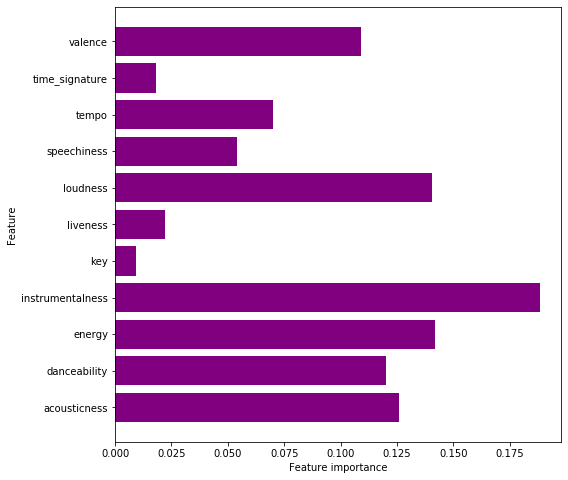

In [271]:
plot_feature_importances(forest)

## CONFUSION MATRIX (Random Forest)

In [272]:
pred = forest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 2  0  5  0  0  3  0  0  1  2  1  0  1  0  1]
 [ 0  7  0  0  0  0  0  2  0  0  0  0  1  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  2  0  0  3  0]
 [ 0  0  0  0  8  1  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  1  2  1]
 [ 1  0  0  0  0  2  2  0  4  2  1  0  3  0  0]
 [ 0  6  1  2  0  1  0  2  1  0  1  0  1  0  0]
 [ 4  1  1  0  0  1  0  0 14  0  0  0  0  0  0]
 [ 0  0  3  0  0  1  0  0  4 13  2  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  1  5  0  0]
 [ 1  0  0  0  0  3  0  0  1  3  0  0 14  0  1]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0 13  0]
 [ 1  0  0  0  0  5  0  0  2  1  0  0  1  0  5]]
                precision    recall  f1-score   support

                     0.22      0.12      0.16        16
           50s       0.41      0.70      0.52        10
     Chill_hop       0.57      0.93      0.70        14
     Classical       0.75      0.71      0.73        1

In [284]:
cm = confusion_matrix(y_test, pred)
classes = ['50s', 'Chill_hop', 'Classical', 
           'Detroit_Techno', 'Disco', 'Electronic', 
           'French', 'Hip_hop', 'Industrial_pop', 
           'Post_Rock', 'Rockabilly', 'Ska', 'Sleep', 'Spanish']

In [285]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[0 0 0 2 2 2 0 1 1 1 1 1 3 3 1]
 [0 1 1 2 1 1 0 0 3 0 2 0 1 0 1]
 [0 1 1 0 1 6 0 2 2 2 1 0 2 4 0]
 [1 3 1 2 0 3 0 0 4 1 2 0 0 2 1]
 [0 0 2 2 0 1 0 0 1 2 2 0 3 3 0]
 [2 1 1 2 1 2 1 0 2 2 2 0 4 2 0]
 [2 1 0 1 0 1 0 0 0 1 3 0 1 2 0]
 [0 1 1 0 0 1 0 0 1 1 0 0 0 0 1]
 [3 1 0 2 0 1 0 0 3 3 4 0 1 2 0]
 [1 0 2 0 0 1 0 0 4 1 3 0 3 1 0]
 [0 2 5 0 0 1 0 1 1 1 0 0 3 2 0]
 [0 2 1 0 0 1 1 0 1 0 2 0 0 2 1]
 [0 3 4 1 2 0 0 0 3 5 3 0 1 1 2]
 [0 0 3 2 1 3 0 0 1 1 3 0 2 3 1]
 [0 1 1 0 0 3 0 0 0 0 2 0 6 3 0]]


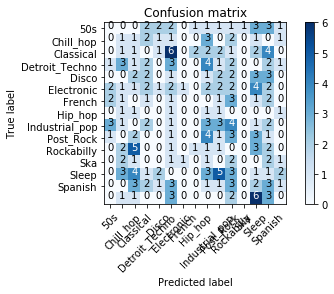

In [286]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Running Tests (Support Vector Machine)

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [385]:
X_train = X_train.fillna(X_train.mean())

In [386]:
X_test = X_test.fillna(X_train.mean())

In [387]:
y_train = y_train.fillna('')

In [388]:
y_test = y_test.fillna('')

In [381]:
tic = time()
svclassifier = SVC(kernel='linear', C=.00606667)  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.09425592422485352 seconds


In [382]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[ 4  0  2  0  0  2  0  0  0  9  0  0  2  0  0]
 [ 2  0  4  0  0  2  0  0  2  1  4  0  3  0  0]
 [ 0  0 13  0  0  0  0  0  1  1  3  0  1  0  1]
 [ 0  0  2  9  0  1  0  0  0  0  1  0  0  5  0]
 [ 0  0  0  2  0  7  0  0  0  0  3  0  0  0  0]
 [ 1  0  0  0  0 12  0  0  0 10  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  1  0  0]
 [ 0  0  5  0  0  2  0  0  0  1  1  0  0  1  2]
 [ 2  0  2  0  0  1  0  0  0  4  2  0  3  0  4]
 [ 2  0  1  0  0  2  0  0  0  7  0  0  3  0  1]
 [ 2  0  3  0  0  2  0  0  1  2  7  0  0  1  0]
 [ 0  0  2  0  0  0  0  0  0  0  1  0  9  0  1]
 [ 2  0  0  0  0  0  0  0  2  6  0  0  6  0  2]
 [ 0  0  0  3  0  7  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  4]]
                precision    recall  f1-score   support

                     0.27      0.21      0.24        19
           50s       0.00      0.00      0.00        18
     Chill_hop       0.38      0.65      0.48        20
     Classical       0.64      0.50      0.56        1

## Running Tests (Logistical Regression)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)


In [300]:
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X_test, y_test, sample_weight=None)

0.4782608695652174

In [296]:
logreg.coef_

array([[-1.34500290e+00,  2.11154636e+00, -9.01933181e-01,
        -5.99218369e-01, -3.92739252e-02,  1.41344597e-02,
         1.06424595e-01, -4.31884751e-01, -3.15318733e-03,
        -7.70752735e-02, -8.24109700e-01],
       [ 3.83991051e+00, -1.05938808e+00, -1.55876859e+00,
        -2.86178642e+00,  3.88896189e-03,  8.54550733e-02,
         1.18696095e-01, -1.23720974e+00,  2.15674912e-03,
        -5.56177604e-01,  3.11080459e+00],
       [ 4.14722649e-01,  2.62476028e+00, -3.21238651e+00,
         2.68854808e+00,  3.51298159e-03,  9.01290147e-01,
         1.82493587e-01,  3.74719342e+00, -1.74591270e-02,
         2.13745886e-01, -1.07659400e+00],
       [ 1.88382978e+00, -2.55962770e+00, -2.26127736e+00,
        -3.70390895e-01,  2.86706268e-02, -4.11059162e-01,
        -7.35360344e-02, -5.05785355e-01,  8.54409836e-03,
        -5.70370836e-01, -5.00471856e-01],
       [-1.93807574e+00,  1.69324142e+00,  1.31448293e+00,
         1.88262341e+00, -1.43588250e-02, -1.20261119e+00,
  

In [301]:
df_logco = pd.DataFrame(logreg.coef_)

In [302]:
df_logco

,0,1,2,3,4,5,6,7,8,9,10
0,-1.345003,2.111546,-0.901933,-0.599218,-0.039274,0.014134,0.106425,-0.431885,-0.003153,-0.077075,-0.824110
1,3.839911,-1.059388,-1.558769,-2.861786,0.003889,0.085455,0.118696,-1.237210,0.002157,-0.556178,3.110805
2,0.414723,2.624760,-3.212387,2.688548,0.003513,0.901290,0.182494,3.747193,-0.017459,0.213746,-1.076594
3,1.883830,-2.559628,-2.261277,-0.370391,0.028671,-0.411059,-0.073536,-0.505785,0.008544,-0.570371,-0.500472
4,-1.938076,1.693241,1.314483,1.882623,-0.014359,-1.202611,-0.068877,0.149474,-0.000449,-0.607364,-0.443408
5,-1.789189,2.165158,0.360802,-0.965647,-0.020164,-0.443912,-0.106130,-1.313963,-0.008561,-0.804058,3.341194
6,-1.276645,1.086158,1.423282,-0.480311,0.026856,0.514107,0.349188,-0.698731,0.000336,-0.444498,-1.856997
7,1.726648,-0.931632,-2.351785,-3.436761,-0.030956,1.250451,0.049411,-0.182069,-0.003348,-0.263663,0.655521
8,-0.361283,3.130946,-3.313892,-3.117525,-0.014587,-0.920098,0.230166,2.149288,0.009992,-0.021789,-2.384079
9,-3.499891,-0.339250,0.900844,-0.738109,0.023082,1.242422,0.131687,-0.652055,-0.009430,0.435165,-1.921687


In [297]:
logreg.intercept_

array([-0.49053042, -1.20913359, -0.51664659, -1.23782135, -2.69776022,
       -1.95370105,  0.49092935,  0.04838919,  0.04036571, -1.08526113,
        0.02992442, -1.79281667, -0.8113461 , -1.56991599, -0.1172897 ])

## Running Test (Adaboost)

In [384]:
X_train, X_test, y_train, y_test = train_test_split(complete_scaled_df, y, test_size=0.25, random_state=42)

In [313]:
adaboost_clf = AdaBoostClassifier(random_state=42)
gbt_clf = GradientBoostingClassifier(random_state=42)

In [314]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [315]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [316]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [322]:
def display_acc_and_f1_score(true, preds, model_name, average='micro'):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='micro')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.23312236286919832
F1-Score: 0.23312236286919832

Model: Gradient Boosted Trees
Accuracy: 0.9578059071729957
F1-Score: 0.9578059071729959

Testing Metrics
Model: AdaBoost
Accuracy: 0.20189274447949526
F1-Score: 0.20189274447949526

Model: Gradient Boosted Trees
Accuracy: 0.5520504731861199
F1-Score: 0.5520504731861199


In [389]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
print(adaboost_confusion_matrix)

[[ 0  0  0  0  0  0  0  0 27  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  3  0 12  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  0 12  0  0  0  0]
 [ 0  0  0  0  1  1  0  0 18  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 19  0  5  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 23  0  3  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0]]


In [325]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
print(gbt_confusion_matrix)

[[11  0  3  0  0  2  3  0  5  9  0  1  0  0  0]
 [ 0  9  0  0  0  2  0  3  0  0  1  0  1  0  2]
 [ 1  0 12  0  0  0  0  0  1  0  2  0  0  1  0]
 [ 0  1  0 19  0  0  0  0  0  0  2  0  0  4  0]
 [ 1  0  0  0  5  0  0  0  0  0  1  0  0  7  0]
 [ 1  0  0  0  0 19  0  0  0  1  0  0  1  4  0]
 [ 2  0  0  0  0  2  7  1  1  2  0  0  1  0  0]
 [ 1  0  0  0  0  1  0  7  0  2  0  0  0  0  0]
 [ 3  0  0  0  0  1  0  0 17  2  0  0  0  0  0]
 [ 4  0  1  0  0  0  2  0  1 11  1  0  3  0  2]
 [ 1  0  1  1  1  0  0  1  0  0 16  0  0  1  0]
 [ 0  6  0  0  0  1  0  1  0  1  0  3  7  0  0]
 [ 1  1  0  0  0  3  1  0  1  3  0  3 13  0  2]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0 16  0]
 [ 1  0  0  0  0  2  0  0  1  0  0  0  0  0 10]]


In [326]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

                precision    recall  f1-score   support

                     0.00      0.00      0.00        34
           50s       0.00      0.00      0.00        18
     Chill_hop       0.00      0.00      0.00        17
     Classical       0.48      0.81      0.60        26
Detroit_Techno       0.00      0.00      0.00        14
         Disco       0.33      0.04      0.07        26
    Electronic       0.00      0.00      0.00        16
        French       0.00      0.00      0.00        11
       Hip_hop       0.12      0.96      0.21        23
Industrial_Pop       0.00      0.00      0.00        25
     Post_Rock       0.25      0.91      0.39        22
    Rockabilly       0.00      0.00      0.00        19
           Ska       0.00      0.00      0.00        28
         Sleep       0.00      0.00      0.00        24
       Spanish       0.00      0.00      0.00        14

      accuracy                           0.20       317
     macro avg       0.08      0.18      0.08 

In [327]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

                precision    recall  f1-score   support

                     0.41      0.32      0.36        34
           50s       0.53      0.50      0.51        18
     Chill_hop       0.71      0.71      0.71        17
     Classical       0.68      0.73      0.70        26
Detroit_Techno       0.83      0.36      0.50        14
         Disco       0.58      0.73      0.64        26
    Electronic       0.54      0.44      0.48        16
        French       0.54      0.64      0.58        11
       Hip_hop       0.63      0.74      0.68        23
Industrial_Pop       0.35      0.44      0.39        25
     Post_Rock       0.70      0.73      0.71        22
    Rockabilly       0.43      0.16      0.23        19
           Ska       0.50      0.46      0.48        28
         Sleep       0.48      0.67      0.56        24
       Spanish       0.62      0.71      0.67        14

      accuracy                           0.55       317
     macro avg       0.57      0.56      0.55 

## Running Test (XGBoost)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [340]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [341]:
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [342]:
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

In [343]:
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 93.67%
Validation accuracy: 58.04%


## Comparing to GridSearch

In [344]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [345]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5

Training Accuracy: 95.57%
Validation accuracy: 58.68%


## Running Tests (Grid Search - Decision Trees V Random Forrest)

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [354]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=10)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 43.58%


## Decisions Trees - Gridsearch

In [355]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [356]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [357]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [358]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 49.98%
Mean Test Score: 41.96%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

## Random Forrests - GridSearch

In [359]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=10))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 52.58%


In [360]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [361]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 60.97%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [363]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score*100)
print('Random forest grid search: ', rf_score*100)

Decision tree grid search:  41.95583596214511
Random forest grid search:  58.67507886435332
